In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Show all columns
pd.set_option('display.max_columns', None)

# 1.Read Data

In [2]:
loan_path = 'C:\\Code_Hanh\\Financial Programming\\FP_GroupProject_GroupXX\\FP_GroupProject_GroupXX\\data\\raw\\data_berka\\loan.asc'
account_path = 'C:\\Code_Hanh\\Financial Programming\\FP_GroupProject_GroupXX\\FP_GroupProject_GroupXX\\data\\raw\\data_berka\\account.asc'
card_path = 'C:\\Code_Hanh\\Financial Programming\\FP_GroupProject_GroupXX\\FP_GroupProject_GroupXX\\data\\raw\\data_berka\\card.asc'
client_path = 'C:\\Code_Hanh\\Financial Programming\\FP_GroupProject_GroupXX\\FP_GroupProject_GroupXX\\data\\raw\\data_berka\\client.asc'
disp_path = 'C:\\Code_Hanh\\Financial Programming\\FP_GroupProject_GroupXX\\FP_GroupProject_GroupXX\\data\\raw\\data_berka\\disp.asc'
district_path = 'C:\\Code_Hanh\\Financial Programming\\FP_GroupProject_GroupXX\\FP_GroupProject_GroupXX\\data\\raw\\data_berka\\district.asc'
order_path = 'C:\\Code_Hanh\\Financial Programming\\FP_GroupProject_GroupXX\\FP_GroupProject_GroupXX\\data\\raw\\data_berka\\order.asc'
trans_path = 'C:\\Code_Hanh\\Financial Programming\\FP_GroupProject_GroupXX\\FP_GroupProject_GroupXX\\data\\raw\\data_berka\\trans.asc'

In [3]:
loan_df = pd.read_csv(loan_path, delimiter=';')
account_df = pd.read_csv(account_path, delimiter=';')
client_df = pd.read_csv(client_path, delimiter=';')
district_df = pd.read_csv(district_path, delimiter=';')
order_df = pd.read_csv(order_path, delimiter=';')
trans_df = pd.read_csv(trans_path, delimiter=';')
card_df = pd.read_csv(card_path, delimiter=';')
disp_df = pd.read_csv(disp_path, delimiter=';')

C:\Users\Source\AppData\Local\Temp\ipykernel_22004\108161713.py:6: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  trans_df = pd.read_csv(trans_path, delimiter=';')


# 2. Create Independent Variables

In [4]:
from datetime import datetime

## Table1: Account

In [5]:
account_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   account_id   4500 non-null   int64 
 1   district_id  4500 non-null   int64 
 2   frequency    4500 non-null   object
 3   date         4500 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 140.8+ KB


In [6]:
account_df.head()

account_id  district_id         frequency    date
0         576           55  POPLATEK MESICNE  930101
1        3818           74  POPLATEK MESICNE  930101
2         704           55  POPLATEK MESICNE  930101
3        2378           16  POPLATEK MESICNE  930101
4        2632           24  POPLATEK MESICNE  930102

In [7]:
# Check the NA value
account_df.isna().sum().sum()

0

In [8]:
# Checking for duplicate values in table account for account_id
duplicateaccount = account_df.duplicated(subset=['account_id']).sum()
print(duplicateaccount)

0


In [9]:
# Select the accounts that openned before 1996 to have sufficient data for IV period (1 year)
account_df['date']=pd.to_datetime(account_df['date'].astype(str))
account_df['account_open_year'] = account_df['date'].dt.year
account_iv = account_df[account_df['account_open_year'] < 1996]

C:\Users\Source\AppData\Local\Temp\ipykernel_22004\2218757124.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  account_df['date']=pd.to_datetime(account_df['date'].astype(str))


In [10]:
# Add the LOR field in the account dataset
account_iv.loc[:, 'account_lor'] = 1996 - account_iv.loc[:, 'account_open_year']

C:\Users\Source\AppData\Local\Temp\ipykernel_22004\4190174443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  account_iv.loc[:, 'account_lor'] = 1996 - account_iv.loc[:, 'account_open_year']


In [11]:
# Create new variable: Frequency Score
frequency_mapping = {
    'POPLATEK MESICNE': 'Monthly Issuance',
    'POPLATEK TYDNE': 'Weekly Issuance',
    'POPLATEK PO OBRATU': 'Issuance After Transaction'
}

# Apply the mapping to change the 'Frequency' column
account_iv['frequency'] = account_iv['frequency'].map(frequency_mapping)

# Creating 'Frequency Type Score'
frequency_type_score = {
    'Monthly Issuance': 1,
    'Weekly Issuance': 2,
    'Issuance After Transaction': 3
}

account_iv['Frequency Type Score'] = account_iv['frequency'].map(frequency_type_score)

C:\Users\Source\AppData\Local\Temp\ipykernel_22004\413466811.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  account_iv['frequency'] = account_iv['frequency'].map(frequency_mapping)
C:\Users\Source\AppData\Local\Temp\ipykernel_22004\413466811.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  account_iv['Frequency Type Score'] = account_iv['frequency'].map(frequency_type_score)


In [12]:
# Rename column
account_iv = account_iv.rename(columns={'date':'Account Open Date','account_open_year':'Account Open Year',
                                        'account_lor':'LOR of Account','frequency':'Frequency'})

In [13]:
account_iv.shape

(2239, 7)

## Table2: Disposition

In [14]:
disp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   disp_id     5369 non-null   int64 
 1   client_id   5369 non-null   int64 
 2   account_id  5369 non-null   int64 
 3   type        5369 non-null   object
dtypes: int64(3), object(1)
memory usage: 167.9+ KB


In [15]:
disp_df.head()

disp_id  client_id  account_id       type
0        1          1           1      OWNER
1        2          2           2      OWNER
2        3          3           2  DISPONENT
3        4          4           3      OWNER
4        5          5           3  DISPONENT

In [16]:
# Check the NA value
disp_df.isna().sum().sum()

0

In [17]:
# Checking for duplicate values in table disp for account_id, client_id and disp_id
duplicatedisp = disp_df.duplicated(subset=['account_id']).sum()
print(duplicatedisp)

duplicatedisp2 = disp_df.duplicated(subset=['client_id']).sum()
print(duplicatedisp2)

duplicatedisp3 = disp_df.duplicated(subset=['disp_id']).sum()
print(duplicatedisp3)

# Result each client_id has only one disp_id but one account_id have many client_id and disp_id

869
0
0


In [18]:
# Aggregating all clientid per accountid
unique_account_clients = disp_df.groupby('account_id')['client_id'].nunique().reset_index()
unique_account_clients.columns = ['account_id', 'Total Client ID']
# Select only infor of OWNER
disp_df_1 = disp_df[disp_df['type'] == 'OWNER']

In [19]:
# Final Disposition Table, ,merging all the newly created variables by accountid
disp_final = pd.merge(disp_df_1, unique_account_clients, how='left', on='account_id')

In [20]:
# Check how many client_id with each account_id
count_per_account = disp_final.groupby('account_id')['client_id'].count().reset_index()
count_per_account.columns = ['account_id', 'client_count']
x = len(count_per_account[count_per_account['client_count'] >= 2])
x

# Result is 0, data was already cleaned

0

In [21]:
# Rename column
disp_final = disp_final.rename(columns={'type':'Client Type'})

In [22]:
disp_final.head()

disp_id  client_id  account_id Client Type  Total Client ID
0        1          1           1       OWNER                1
1        2          2           2       OWNER                2
2        4          4           3       OWNER                2
3        6          6           4       OWNER                1
4        7          7           5       OWNER                1

## Table3: Credit Card

In [23]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   card_id  892 non-null    int64 
 1   disp_id  892 non-null    int64 
 2   type     892 non-null    object
 3   issued   892 non-null    object
dtypes: int64(2), object(2)
memory usage: 28.0+ KB


In [24]:
card_df.head()

card_id  disp_id     type           issued
0     1005     9285  classic  931107 00:00:00
1      104      588  classic  940119 00:00:00
2      747     4915  classic  940205 00:00:00
3       70      439  classic  940208 00:00:00
4      577     3687  classic  940215 00:00:00

In [25]:
# Check the NA value
card_df.isna().sum().sum()

0

In [26]:
# Checking for duplicate values in table card for card_id
duplicatecard = card_df.duplicated(subset=['card_id']).sum()
print(duplicatecard)

0


In [27]:
# Checking among the client who have credit card, how many are OWNER and how many are DISPONENT
merge_check_type = pd.merge(disp_df, card_df, how='left', on='disp_id')
count_owners = len(merge_check_type[(merge_check_type['card_id'].notna()) & (merge_check_type['type_x'] == 'OWNER')])
count_disponent = len(merge_check_type[(merge_check_type['card_id'].notna()) & (merge_check_type['type_x'] == 'DISPONENT')])

print(count_owners)
print(count_disponent)

# RESULT: All Credit Card holder is the OWNER of account_id

892
0


In [28]:
# Select the cards that openned before 1996 to have sufficient data for IV period (1 year)
card_df['issued']=pd.to_datetime(card_df['issued'].astype(str))
card_df['card_open_year'] = card_df['issued'].dt.year
card_iv = card_df[card_df['card_open_year'] <= 1996]

C:\Users\Source\AppData\Local\Temp\ipykernel_22004\1373325562.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  card_df['issued']=pd.to_datetime(card_df['issued'].astype(str))


In [29]:
# Add the LOR field in the card dataset
card_iv.loc[:, 'card_lor'] = 1996 - card_iv.loc[:, 'card_open_year']

C:\Users\Source\AppData\Local\Temp\ipykernel_22004\2775551259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  card_iv.loc[:, 'card_lor'] = 1996 - card_iv.loc[:, 'card_open_year']


In [30]:
# Rename column
card_iv = card_iv.rename(columns={'type':'Card Type','issued':'Card Open Date',
                                       'card_open_year':'Card Open Year','card_lor':'LOR of Card'})

In [31]:
card_iv.head()

card_id  disp_id Card Type Card Open Date  Card Open Year  LOR of Card
0     1005     9285   classic     1993-11-07            1993            3
1      104      588   classic     1994-01-19            1994            2
2      747     4915   classic     1994-02-05            1994            2
3       70      439   classic     1994-02-08            1994            2
4      577     3687   classic     1994-02-15            1994            2

## Table4: Loan

In [32]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   loan_id     682 non-null    int64  
 1   account_id  682 non-null    int64  
 2   date        682 non-null    int64  
 3   amount      682 non-null    int64  
 4   duration    682 non-null    int64  
 5   payments    682 non-null    float64
 6   status      682 non-null    object 
dtypes: float64(1), int64(5), object(1)
memory usage: 37.4+ KB


In [33]:
loan_df.head()

loan_id  account_id    date  amount  duration  payments status
0     5314        1787  930705   96396        12    8033.0      B
1     5316        1801  930711  165960        36    4610.0      A
2     6863        9188  930728  127080        60    2118.0      A
3     5325        1843  930803  105804        36    2939.0      A
4     7240       11013  930906  274740        60    4579.0      A

In [34]:
# Checking for empty values in table transactions
missingloan= loan_df.isna().sum().sum()
missingloan

0

In [35]:
# Checking for duplicate values in table loans for loan_id
duplicateloan=loan_df.duplicated(subset=['loan_id']).sum()
duplicateloan

0

In [36]:
# Checking for duplicate values in table loans for account_id
duplicateloan_account=loan_df.duplicated(subset=['account_id']).sum()
duplicateloan_account

0

In [37]:
# Turning the date column in a date format YY-MM-DD
loan_df['date']=pd.to_datetime(loan_df['date'].astype(str))

# Creating new variable in the dataframe to store only the year
loan_df['year']=loan_df['date'].astype(str).str[:4]

# Select only loans dated 1996
loan_iv= loan_df[loan_df['year'] <= '1996']

loan_iv.head()

C:\Users\Source\AppData\Local\Temp\ipykernel_22004\3684351261.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  loan_df['date']=pd.to_datetime(loan_df['date'].astype(str))


loan_id  account_id       date  amount  duration  payments status  year
0     5314        1787 1993-07-05   96396        12    8033.0      B  1993
1     5316        1801 1993-07-11  165960        36    4610.0      A  1993
2     6863        9188 1993-07-28  127080        60    2118.0      A  1993
3     5325        1843 1993-08-03  105804        36    2939.0      A  1993
4     7240       11013 1993-09-06  274740        60    4579.0      A  1993

In [38]:
print(loan_iv['payments'].max())
print(loan_iv['payments'].min())
print(loan_iv['amount'].max())
print(loan_iv['amount'].min())

9689.0
319.0
538500
4980


In [39]:
# Create 2 new cols: Loan payment cat & Loan amount cat
bins2= [0,2500,5000,7500,float('inf')]
labels2=[1,2,3,4]
loan_iv['loan_pay_cat']= pd.cut(loan_iv['payments'],bins=bins2,labels=labels2,right=False)

bins= [0,100000,200000,300000,400000,float('inf')]
labels=[1,2,3,4,5]
loan_iv['loan_cat']= pd.cut(loan_iv['amount'],bins=bins,labels=labels,right=False)

C:\Users\Source\AppData\Local\Temp\ipykernel_22004\1901841084.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_iv['loan_pay_cat']= pd.cut(loan_iv['payments'],bins=bins2,labels=labels2,right=False)
C:\Users\Source\AppData\Local\Temp\ipykernel_22004\1901841084.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_iv['loan_cat']= pd.cut(loan_iv['amount'],bins=bins,labels=labels,right=False)


In [40]:
# Rename column
loan_iv = loan_iv.rename(columns={'date':'Loan Date','amount':'Loan Amount',
                                 'duration':'Loan Duration','payments':'Loan Payments',
                                 'status':'Loan Status','year':'Loan Years',
                                 'loan_pay_cat':'Loan Payment Cat','loan_cat':'Loan Amount Cat'})

In [41]:
loan_iv.head(1)

loan_id  account_id  Loan Date  Loan Amount  Loan Duration  Loan Payments  \
0     5314        1787 1993-07-05        96396             12         8033.0   

  Loan Status Loan Years Loan Payment Cat Loan Amount Cat  
0           B       1993                4               1

## Table5: Transaction

In [42]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   trans_id    1056320 non-null  int64  
 1   account_id  1056320 non-null  int64  
 2   date        1056320 non-null  int64  
 3   type        1056320 non-null  object 
 4   operation   873206 non-null   object 
 5   amount      1056320 non-null  float64
 6   balance     1056320 non-null  float64
 7   k_symbol    574439 non-null   object 
 8   bank        273508 non-null   object 
 9   account     295389 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 80.6+ MB


In [43]:
trans_df.head()

trans_id  account_id    date    type operation  amount  balance k_symbol  \
0    695247        2378  930101  PRIJEM     VKLAD   700.0    700.0      NaN   
1    171812         576  930101  PRIJEM     VKLAD   900.0    900.0      NaN   
2    207264         704  930101  PRIJEM     VKLAD  1000.0   1000.0      NaN   
3   1117247        3818  930101  PRIJEM     VKLAD   600.0    600.0      NaN   
4    579373        1972  930102  PRIJEM     VKLAD   400.0    400.0      NaN   

  bank  account  
0  NaN      NaN  
1  NaN      NaN  
2  NaN      NaN  
3  NaN      NaN  
4  NaN      NaN

In [44]:
# Checking for empty values in table transactions
missingtrans=trans_df.isna().sum()
missingtrans

trans_id           0
account_id         0
date               0
type               0
operation     183114
amount             0
balance            0
k_symbol      481881
bank          782812
account       760931
dtype: int64

In [45]:
# Replace and rename all null values in table transactions

trans_df['bank']= np.where(trans_df['bank'].isna(),'Other',trans_df['bank'])
trans_df['k_symbol']= np.where(trans_df['k_symbol'].isna(),'Other',trans_df['k_symbol'])
trans_df['account']= np.where(trans_df['account'].isna(),'Not Available',trans_df['account'])

trans_df['operation']= trans_df['operation'].fillna(trans_df['operation'].mode()[0])

In [46]:
# Checking for empty values in table transactions
# We can see there are no longer missing values 
missingtrans=trans_df.isna().sum().sum()
missingtrans

0

In [47]:
# Checking for duplicate values in table transactions for trans id 
duplicatetrans=trans_df.duplicated(subset=['trans_id']).sum()
duplicatetrans

0

In [48]:
# Turning the date column in a date format YY-MM-DD
trans_df['date']=pd.to_datetime(trans_df['date'].astype(str))

# Creating new variable in the dataframe to store only the year
trans_df['year']=trans_df['date'].astype(str).str[:4]

# Selecting only loans dated 1996
trans_iv= trans_df[trans_df['year'] == '1996']

# Creating the month table for each transaction
trans_iv['Month']=trans_iv['date'].dt.month

# Making sure all 12 months are included
trans_iv['Month'].nunique()

C:\Users\Source\AppData\Local\Temp\ipykernel_22004\899531020.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  trans_df['date']=pd.to_datetime(trans_df['date'].astype(str))
C:\Users\Source\AppData\Local\Temp\ipykernel_22004\899531020.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_iv['Month']=trans_iv['date'].dt.month


12

In [49]:
# Checking if there are multiple account ids in table transaction before merging, if there is no duplicate it can be merged as is:
duplicatetrans_account=trans_iv.duplicated(subset=['account_id']).sum()
duplicatetrans_account

# The answer is there so we will have to create aggregated values and group by account_id

193177

In [50]:
# Calculating average credit transactions per month per account_id
trans_jan_credit_avg = trans_iv[trans_iv['Month'].isin([1]) & trans_iv['type'].isin(['PRIJEM'])].groupby('account_id')['amount'].agg('mean').round(0).reset_index()
trans_feb_credit_avg = trans_iv[trans_iv['Month'].isin([2]) & trans_iv['type'].isin(['PRIJEM'])].groupby('account_id')['amount'].agg('mean').round(0).reset_index()
trans_mar_credit_avg = trans_iv[trans_iv['Month'].isin([3]) & trans_iv['type'].isin(['PRIJEM'])].groupby('account_id')['amount'].agg('mean').round(0).reset_index()
trans_apr_credit_avg = trans_iv[trans_iv['Month'].isin([4]) & trans_iv['type'].isin(['PRIJEM'])].groupby('account_id')['amount'].agg('mean').round(0).reset_index()
trans_may_credit_avg = trans_iv[trans_iv['Month'].isin([5]) & trans_iv['type'].isin(['PRIJEM'])].groupby('account_id')['amount'].agg('mean').round(0).reset_index()
trans_june_credit_avg = trans_iv[trans_iv['Month'].isin([6]) & trans_iv['type'].isin(['PRIJEM'])].groupby('account_id')['amount'].agg('mean').round(0).reset_index()
trans_july_credit_avg = trans_iv[trans_iv['Month'].isin([7]) & trans_iv['type'].isin(['PRIJEM'])].groupby('account_id')['amount'].agg('mean').round(0).reset_index()
trans_aug_credit_avg = trans_iv[trans_iv['Month'].isin([8]) & trans_iv['type'].isin(['PRIJEM'])].groupby('account_id')['amount'].agg('mean').round(0).reset_index()
trans_sep_credit_avg = trans_iv[trans_iv['Month'].isin([9]) & trans_iv['type'].isin(['PRIJEM'])].groupby('account_id')['amount'].agg('mean').round(0).reset_index()
trans_oct_credit_avg = trans_iv[trans_iv['Month'].isin([10]) & trans_iv['type'].isin(['PRIJEM'])].groupby('account_id')['amount'].agg('mean').round(0).reset_index()
trans_nov_credit_avg = trans_iv[trans_iv['Month'].isin([11]) & trans_iv['type'].isin(['PRIJEM'])].groupby('account_id')['amount'].agg('mean').round(0).reset_index()
trans_dec_credit_avg = trans_iv[trans_iv['Month'].isin([12]) & trans_iv['type'].isin(['PRIJEM'])].groupby('account_id')['amount'].agg('mean').round(0).reset_index()

# Merge all these average credit transaction column
avg_month_credit = trans_jan_credit_avg

dataframes = [trans_feb_credit_avg, trans_mar_credit_avg, trans_apr_credit_avg,
              trans_may_credit_avg, trans_june_credit_avg, trans_july_credit_avg,
              trans_aug_credit_avg, trans_sep_credit_avg, trans_oct_credit_avg,
              trans_nov_credit_avg, trans_dec_credit_avg]

for df in dataframes:
    avg_month_credit = pd.merge(avg_month_credit, df, on='account_id', how='outer', suffixes=('', '_next'))

# Rename columns to reflect the months
column_names = ['account_id','Avg Cred Jan','Avg Cred Feb','Avg Cred Mar','Avg Cred Apr','Avg Cred May','Avg Cred June','Avg Cred July','Avg Cred Aug','Avg Cred Sep','Avg Cred Oct','Avg Cred Nov','Avg Cred Dec']
avg_month_credit.columns = column_names


In [51]:
# Calculating average withdrawal transactions per month
trans_jan_with_avg = trans_iv[trans_iv['Month'].isin([1]) & ~trans_iv['type'].isin(['PRIJEM'])].groupby('account_id')['amount'].agg('mean').round(0).reset_index()
trans_feb_with_avg = trans_iv[trans_iv['Month'].isin([2]) & ~trans_iv['type'].isin(['PRIJEM'])].groupby('account_id')['amount'].agg('mean').round(0).reset_index()
trans_mar_with_avg = trans_iv[trans_iv['Month'].isin([3]) & ~trans_iv['type'].isin(['PRIJEM'])].groupby('account_id')['amount'].agg('mean').round(0).reset_index()
trans_apr_with_avg = trans_iv[trans_iv['Month'].isin([4]) & ~trans_iv['type'].isin(['PRIJEM'])].groupby('account_id')['amount'].agg('mean').round(0).reset_index()
trans_may_with_avg = trans_iv[trans_iv['Month'].isin([5]) & ~trans_iv['type'].isin(['PRIJEM'])].groupby('account_id')['amount'].agg('mean').round(0).reset_index()
trans_june_with_avg = trans_iv[trans_iv['Month'].isin([6]) & ~trans_iv['type'].isin(['PRIJEM'])].groupby('account_id')['amount'].agg('mean').round(0).reset_index()
trans_july_with_avg = trans_iv[trans_iv['Month'].isin([7]) & ~trans_iv['type'].isin(['PRIJEM'])].groupby('account_id')['amount'].agg('mean').round(0).reset_index()
trans_aug_with_avg = trans_iv[trans_iv['Month'].isin([8]) & ~trans_iv['type'].isin(['PRIJEM'])].groupby('account_id')['amount'].agg('mean').round(0).reset_index()
trans_sep_with_avg = trans_iv[trans_iv['Month'].isin([9]) & ~trans_iv['type'].isin(['PRIJEM'])].groupby('account_id')['amount'].agg('mean').round(0).reset_index()
trans_oct_with_avg = trans_iv[trans_iv['Month'].isin([10]) & ~trans_iv['type'].isin(['PRIJEM'])].groupby('account_id')['amount'].agg('mean').round(0).reset_index()
trans_nov_with_avg = trans_iv[trans_iv['Month'].isin([11]) & ~trans_iv['type'].isin(['PRIJEM'])].groupby('account_id')['amount'].agg('mean').round(0).reset_index()
trans_dec_with_avg = trans_iv[trans_iv['Month'].isin([12]) & ~trans_iv['type'].isin(['PRIJEM'])].groupby('account_id')['amount'].agg('mean').round(0).reset_index()

# Merge all these average withdrawal transaction column
avg_month_with = trans_jan_with_avg

dataframes_with_avg = [trans_feb_with_avg, trans_mar_with_avg,
                       trans_apr_with_avg, trans_may_with_avg, trans_june_with_avg,
                       trans_july_with_avg, trans_aug_with_avg, trans_sep_with_avg,
                       trans_oct_with_avg, trans_nov_with_avg, trans_dec_with_avg]

for df in dataframes_with_avg:
    avg_month_with = pd.merge(avg_month_with, df, on='account_id', how='outer', suffixes=('', '_next'))
    
column_names=['account_id','Avg With Jan','Avg With Feb','Avg With Mar','Avg With Apr','Avg With May','Avg With June',
                        'Avg With July','Avg With Aug','Avg With Sep','Avg With Oct','Avg With Nov','Avg With Dec']
avg_month_with.columns = column_names

avg_month_with.head()

account_id  Avg With Jan  Avg With Feb  Avg With Mar  Avg With Apr  \
0           1         834.0        1233.0        1233.0        1489.0   
1           2        5312.0        3594.0        4970.0        7245.0   
2           6        1454.0        2416.0        1510.0        1830.0   
3           8       17700.0        6142.0        6010.0        5435.0   
4           9        4571.0         722.0         538.0         807.0   

   Avg With May  Avg With June  Avg With July  Avg With Aug  Avg With Sep  \
0        1257.0          942.0         1152.0        1254.0        1389.0   
1        5152.0         3394.0         6221.0        2695.0        6504.0   
2        1984.0         5190.0         1984.0        1984.0        1984.0   
3        4335.0         5077.0         5510.0        4885.0        4560.0   
4         957.0         1722.0          923.0         707.0         407.0   

   Avg With Oct  Avg With Nov  Avg With Dec  
0        1434.0        1756.0        1587.0  
1        3594.0        3296.0        4447.0  
2        1883.0        1984.0        2235.0  
3        5704.0        4488.0        4813.0  
4         582.0          15.0        2805.0

In [52]:
# Aggregating all credit transactions per accountid
trans_agg_credit = trans_iv[trans_iv['type'].isin(['PRIJEM'])].groupby('account_id')['amount'].agg('sum').reset_index()

# Aggregating all withdrawal transactions per accountid
trans_agg_withdrawal = trans_iv[~trans_iv['type'].isin(['PRIJEM'])].groupby('account_id')['amount'].agg('sum').reset_index()

# Aggregating the actual spend by calculating difference between all credits and withdrawal per accountid
trans_agg_actualspend = pd.merge(trans_agg_credit, trans_agg_withdrawal, on='account_id', suffixes=('_credit', '_withdrawal'))
trans_agg_actualspend['actualspend'] = trans_agg_actualspend['amount_credit'].fillna(0) - trans_agg_actualspend['amount_withdrawal'].fillna(0)
trans_agg_actualspend = trans_agg_actualspend[['account_id', 'actualspend']].fillna(0)

#Placing a flag, if the difference between all credits and withdrawal is positive put 1, othewise 0.
trans_agg_actualspend['Spending Flag'] = trans_agg_actualspend['actualspend'].apply(lambda x: 1 if x > 0 else 0)

# Aggregating the average credit transaction per accountid
trans_agg_credit_avg = trans_iv[trans_iv['type'].isin(['PRIJEM'])].groupby('account_id')['amount'].agg('mean').reset_index()


# Aggregating the average withdrawal transaction per accountid
trans_agg_with_avg = trans_iv[~trans_iv['type'].isin(['PRIJEM'])].groupby('account_id')['amount'].agg('mean').reset_index()

# Calculating the earliest balance per accountid registered in 2016
earliest_balance_trans= trans_iv.groupby('account_id')['date'].idxmin()
earliest_balance_trans = pd.DataFrame({
    'account_id': trans_iv.loc[earliest_balance_trans, 'account_id'].values,
    'Begin Balance': trans_iv.loc[earliest_balance_trans, 'balance'].values
})

#Calculating the latest balance per accountid registered in 2016
latest_balance_trans= trans_iv.groupby('account_id')['date'].idxmax()
latest_balance_trans = pd.DataFrame({
    'account_id': trans_iv.loc[latest_balance_trans, 'account_id'].values,
    'Last Balance': trans_iv.loc[latest_balance_trans, 'balance'].values
})


In [53]:
# Final Transactions Table, ,merging all the newly created variables by accountid

dft = trans_agg_credit
dft = pd.merge(dft,trans_agg_withdrawal,how='left',on='account_id')
dft = dft.rename(columns={'amount_x':'Total Credits','amount_y':'Total Withdrawals'})
dft = pd.merge(dft,trans_agg_actualspend,how='left',on='account_id')
dft = dft.rename(columns={'actualspend':'Actual Spend'})
dft = pd.merge(dft,earliest_balance_trans,how='left',on='account_id')

dft = pd.merge(dft,trans_agg_credit_avg,how='left',on='account_id')
dft = dft.rename(columns={'amount':'Average Credit Transaction'})

dft = pd.merge(dft,trans_agg_with_avg,how='left',on='account_id')
dft = dft.rename(columns={'amount':'Average Withdraw Transaction'})

dft = pd.merge(dft,avg_month_credit,how='left',on='account_id')
dft = pd.merge(dft,avg_month_with,how='left',on='account_id')

trans_final = pd.merge(dft,latest_balance_trans,how='left',on='account_id')


# Adding variable to put a flag if the last balance is bigger than begin balance
# If last balance is bigger than begin balance, put 1, otherwise 0
trans_final['Balance Change']=np.where(trans_final['Last Balance']>= trans_final['Begin Balance'], '1','0')

In [54]:
# Credit to Withdrawal Ratio
trans_final['Credit to Withdrawal Ratio'] = trans_final['Total Credits'] / trans_final['Total Withdrawals']

# Average Monthly Credit
credit_columns = [col for col in trans_final.columns if 'Avg Cred' in col]
trans_final['Average Monthly Credit'] = trans_final[credit_columns].mean(axis=1)

# Average Monthly Withdrawal
withdrawal_columns = [col for col in trans_final.columns if 'Avg With' in col]
trans_final['Average Monthly Withdrawal'] = trans_final[withdrawal_columns].mean(axis=1)


#Spending Growth
first_half = ['Avg With Jan', 'Avg With Feb', 'Avg With Mar', 'Avg With Apr', 'Avg With May', 'Avg With June']
second_half = ['Avg With July', 'Avg With Aug', 'Avg With Sep', 'Avg With Oct', 'Avg With Nov', 'Avg With Dec']
trans_final['Spending Growth Haft Year'] = trans_final[second_half].sum(axis=1) - trans_final[first_half].sum(axis=1)

In [55]:
trans_final.head()

account_id  Total Credits  Total Withdrawals  Actual Spend  Spending Flag  \
0           1        50066.0            55579.2       -5513.2            0.0   
1           2       288542.9           274574.2       13968.7            1.0   
2           4        56920.5            31977.6       24942.9            1.0   
3           6        81507.7            81803.2        -295.5            0.0   
4           7        34905.4             6600.0       28305.4            1.0   

   Begin Balance  Average Credit Transaction  Average Withdraw Transaction  \
0        17963.0                 1726.413793                   1235.093333   
1        29522.1                 9949.755172                   4903.110714   
2          800.0                 3348.264706                   1453.527273   
3        33164.7                 3396.154167                   2097.517949   
4          900.0                11635.133333                   6600.000000   

   Avg Cred Jan  Avg Cred Feb  Avg Cred Mar  Avg Cred Apr  Avg Cred May  \
0        1872.0        1280.0        1315.0        1873.0        1871.0   
1        6845.0        8724.0       10211.0       10202.0        9021.0   
2           NaN         800.0        5553.0        5553.0        5553.0   
3        3399.0        3389.0        3391.0        3394.0        3399.0   
4           NaN           NaN           NaN           NaN           NaN   

   Avg Cred June  Avg Cred July  Avg Cred Aug  Avg Cred Sep  Avg Cred Oct  \
0         1715.0         1584.0        2052.0        1879.0        1876.0   
1        12673.0        10218.0       10202.0       10198.0        7902.0   
2         5553.0         2810.0        2829.0        2826.0        2827.0   
3         3389.0         3386.0        3392.0        3398.0        3403.0   
4            NaN            NaN           NaN           NaN           NaN   

   Avg Cred Nov  Avg Cred Dec  Avg With Jan  Avg With Feb  Avg With Mar  \
0        1876.0        1869.0         834.0        1233.0        1233.0   
1       10214.0       15279.0        5312.0        3594.0        4970.0   
2        2832.0        2831.0           NaN           NaN           NaN   
3        3406.0        3406.0        1454.0        2416.0        1510.0   
4         900.0       17003.0           NaN           NaN           NaN   

   Avg With Apr  Avg With May  Avg With June  Avg With July  Avg With Aug  \
0        1489.0        1257.0          942.0         1152.0        1254.0   
1        7245.0        5152.0         3394.0         6221.0        2695.0   
2           NaN           NaN            NaN         1067.0        1869.0   
3        1830.0        1984.0         5190.0         1984.0        1984.0   
4           NaN           NaN            NaN            NaN           NaN   

   Avg With Sep  Avg With Oct  Avg With Nov  Avg With Dec  Last Balance  \
0        1389.0        1434.0        1756.0        1587.0       12659.9   
1        6504.0        3594.0        3296.0        4447.0       53390.9   
2        1669.0        1126.0        1126.0        1574.0       24943.0   
3        1984.0        1883.0        1984.0        2235.0       33509.2   
4           NaN           NaN           NaN        6600.0       28305.4   

  Balance Change  Credit to Withdrawal Ratio  Average Monthly Credit  \
0              0                    0.900805             1755.166667   
1              1                    1.050874            10140.750000   
2              1                    1.780012             3633.363636   
3              1                    0.996388             3396.000000   
4              1                    5.288697             8951.500000   

   Average Monthly Withdrawal  Spending Growth Haft Year  
0                 1296.666667                     1584.0  
1                 4702.000000                    -2910.0  
2                 1405.166667                     8431.0  
3                 2203.166667                    -2330.0  
4                 6600.000000                 

## Table6: Order

In [56]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6471 entries, 0 to 6470
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    6471 non-null   int64  
 1   account_id  6471 non-null   int64  
 2   bank_to     6471 non-null   object 
 3   account_to  6471 non-null   int64  
 4   amount      6471 non-null   float64
 5   k_symbol    6471 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 303.5+ KB


In [57]:
order_df.head()

order_id  account_id bank_to  account_to  amount k_symbol
0     29401           1      YZ    87144583  2452.0     SIPO
1     29402           2      ST    89597016  3372.7     UVER
2     29403           2      QR    13943797  7266.0     SIPO
3     29404           3      WX    83084338  1135.0     SIPO
4     29405           3      CD    24485939   327.0

In [58]:
# Checking for empty values in table order
missingorder=order_df.isna().sum()
missingorder

order_id      0
account_id    0
bank_to       0
account_to    0
amount        0
k_symbol      0
dtype: int64

In [59]:
# Checking for duplicate values in table loans for loan_id
duplicateorder=order_df.duplicated(subset=['order_id']).sum()
print(duplicateorder)

# Checking for duplicate values in table loans for account_id
duplicateorder_account=order_df.duplicated(subset=['account_id']).sum()
print(duplicateorder_account)

# The answer is there so many duplicate account_id so we will have to create aggregated values.

0
2713


In [60]:
# Aggregating all total amount of housing orders per accountid
total_amount_housing = order_df[order_df['k_symbol'].isin(['SIPO'])].groupby('account_id')['amount'].agg('sum').reset_index()

# Aggregating all total amount of loan orders per accountid
total_amount_loan = order_df[order_df['k_symbol'].isin(['UVER'])].groupby('account_id')['amount'].agg('sum').reset_index()

# Aggregating all total amount of Insurance orders per accountid
total_amount_insurance = order_df[order_df['k_symbol'].isin(['POJISTNE'])].groupby('account_id')['amount'].agg('sum').reset_index()

# Aggregating all total amount of Leasing orders per accountid
total_amount_leasing = order_df[order_df['k_symbol'].isin(['LEASING'])].groupby('account_id')['amount'].agg('sum').reset_index()

# Aggregating all other orders amount without a k_symbol per accountid
total_amount_other = order_df[order_df['k_symbol'].isin([' '])].groupby('account_id')['amount'].agg('sum').reset_index()

In [61]:
# Aggregating all total order of housing orders per accountid
total_order_housing = order_df[order_df['k_symbol'].isin(['SIPO'])].groupby('account_id')['order_id'].agg('count').reset_index()

# Aggregating all total order of loan orders per accountid
total_order_loan = order_df[order_df['k_symbol'].isin(['UVER'])].groupby('account_id')['order_id'].agg('count').astype('int').reset_index()

# Aggregating all total order of Insurance orders per accountid
total_order_insurance = order_df[order_df['k_symbol'].isin(['POJISTNE'])].groupby('account_id')['order_id'].agg('count').astype('int').reset_index()

# Aggregating all total order of Leasing orders per accountid
total_order_leasing = order_df[order_df['k_symbol'].isin(['LEASING'])].groupby('account_id')['order_id'].agg('count').astype('int').reset_index()

# Aggregating all other total orders without a k_symbol per accountid
total_order_other = order_df[order_df['k_symbol'].isin([' '])].groupby('account_id')['order_id'].agg('count').astype('int').reset_index()

In [62]:
#Final Orders Table, ,merging all the newly created variables by accountid
dfo = total_amount_housing
dfo = pd.merge(dfo,total_amount_loan,how='left',on='account_id')
dfo = dfo.rename(columns={'amount_x':'Household Orders Amount','amount_y':'Loan Orders Amount'})
dfo = pd.merge(dfo,total_amount_insurance,how='left',on='account_id')
dfo = dfo.rename(columns={'amount':'Insurance Orders Amount'})
dfo = pd.merge(dfo,total_amount_leasing,how='left',on='account_id')
dfo = dfo.rename(columns={'amount':'Leasing Orders Amount'})
dfo = pd.merge(dfo,total_amount_other,how='left',on='account_id')
dfo = dfo.rename(columns={'amount':'Other Orders Amount'})

dfo = pd.merge(dfo,total_order_housing,how='left',on='account_id')
dfo = dfo.rename(columns={'order_id':'Total Household Orders'})
dfo = pd.merge(dfo,total_order_loan,how='left',on='account_id')
dfo = dfo.rename(columns={'order_id':'Total Loan Orders'})
dfo = pd.merge(dfo,total_order_insurance,how='left',on='account_id')
dfo = dfo.rename(columns={'order_id':'Total Insurance Orders'})
dfo = pd.merge(dfo,total_order_leasing,how='left',on='account_id')
dfo = dfo.rename(columns={'order_id':'Total Leasing Orders'})
dfo = pd.merge(dfo,total_order_other,how='left',on='account_id')
order_final = dfo.rename(columns={'order_id':'Total Other Orders'})

In [63]:
# Create new orders flag column, if an account have order, the value will be 1, if not, return 0
order_final['Household Flag'] = np.where(order_final['Total Household Orders'].isnull(),0,1)
order_final['Loan Flag'] = np.where(order_final['Total Loan Orders'].isnull(),0,1)
order_final['Insurance Flag'] = np.where(order_final['Total Insurance Orders'].isnull(),0,1)
order_final['Leasing Flag'] = np.where(order_final['Total Leasing Orders'].isnull(),0,1)
order_final['Other Orders Flag'] = np.where(order_final['Total Other Orders'].isnull(),0,1)

In [64]:
order_final.head()

account_id  Household Orders Amount  Loan Orders Amount  \
0           1                   2452.0                 NaN   
1           2                   7266.0              3372.7   
2           3                   1135.0                 NaN   
3           4                   3363.0                 NaN   
4           5                   2668.0                 NaN   

   Insurance Orders Amount  Leasing Orders Amount  Other Orders Amount  \
0                      NaN                    NaN                  NaN   
1                      NaN                    NaN                  NaN   
2                   3539.0                    NaN                327.0   
3                      NaN                    NaN                  NaN   
4                      NaN                    NaN                  NaN   

   Total Household Orders  Total Loan Orders  Total Insurance Orders  \
0                       1                NaN                     NaN   
1                       1                1.0                     NaN   
2                       1                NaN                     1.0   
3                       2                NaN                     NaN   
4                       1                NaN                     NaN   

   Total Leasing Orders  Total Other Orders  Household Flag  Loan Flag  \
0                   NaN                 NaN               1          0   
1                   NaN                 NaN               1          1   
2                   NaN                 1.0               1          0   
3                   NaN                 NaN               1          0   
4                   NaN                 NaN               1          0   

   Insurance Flag  Leasing Flag  Other Orders Flag  
0               0             0                  0  
1               0             0                  0  
2               1             0                  1  
3               0             0                  0  
4               0             0                  0

## Table7: District


In [65]:
#Changing the variable names for the demographic dataset
new_column_names = {
    'A1': 'district_id',
    'A2': 'district_name',
    'A3': 'region',
    'A4': 'inhabitants',
    'A5': 'municipalities_lt_499',
    'A6': 'municipalities_500_1999',
    'A7': 'municipalities_2000_9999',
    'A8': 'municipalities_gt_10000',
    'A9': 'cities',
    'A10': 'urban_ratio',
    'A11': 'average_salary',
    'A12': 'unemployment_rate_95',
    'A13': 'unemployment_rate_96',
    'A14': 'entrepreneurs_per_1000',
    'A15': 'crimes_95',
    'A16': 'crimes_96'
}

# Rename columns using the mapping
district_df.rename(columns=new_column_names, inplace=True)

# Display the updated DataFrame
district_df.head()

district_id district_name           region  inhabitants  \
0            1   Hl.m. Praha           Prague      1204953   
1            2       Benesov  central Bohemia        88884   
2            3        Beroun  central Bohemia        75232   
3            4        Kladno  central Bohemia       149893   
4            5         Kolin  central Bohemia        95616   

   municipalities_lt_499  municipalities_500_1999  municipalities_2000_9999  \
0                      0                        0                         0   
1                     80                       26                         6   
2                     55                       26                         4   
3                     63                       29                         6   
4                     65                       30                         4   

   municipalities_gt_10000  cities  urban_ratio  average_salary  \
0                        1       1        100.0           12541   
1                        2       5         46.7            8507   
2                        1       5         41.7            8980   
3                        2       6         67.4            9753   
4                        1       6         51.4            9307   

  unemployment_rate_95  unemployment_rate_96  entrepreneurs_per_1000  \
0                 0.29                  0.43                     167   
1                 1.67                  1.85                     132   
2                 1.95                  2.21                     111   
3                 4.64                  5.05                     109   
4                 3.85                  4.43                     118   

  crimes_95  crimes_96  
0     85677      99107  
1      2159       2674  
2      2824       2813  
3      5244       5892  
4      2616       3040

In [66]:
#cheking for NULLs
district_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   district_id               77 non-null     int64  
 1   district_name             77 non-null     object 
 2   region                    77 non-null     object 
 3   inhabitants               77 non-null     int64  
 4   municipalities_lt_499     77 non-null     int64  
 5   municipalities_500_1999   77 non-null     int64  
 6   municipalities_2000_9999  77 non-null     int64  
 7   municipalities_gt_10000   77 non-null     int64  
 8   cities                    77 non-null     int64  
 9   urban_ratio               77 non-null     float64
 10  average_salary            77 non-null     int64  
 11  unemployment_rate_95      77 non-null     object 
 12  unemployment_rate_96      77 non-null     float64
 13  entrepreneurs_per_1000    77 non-null     int64  
 14  crimes_95   

In [67]:
# Checking for empty values in table order
missingdistrict = district_df.isna().sum().sum()
missingdistrict 

0

In [68]:
#Change the type of "unemployment_rate_95" to a float
# the "unemployment_rate_95" has '?' , we will replace the symbol with (-1) to able to change the variable to a float

In [69]:
# Replace '?' with (-1)
district_df['unemployment_rate_95'].replace('?', -1, inplace=True)
# Convert the column to float
district_df['unemployment_rate_95'] = district_df['unemployment_rate_95'].astype(float)

In [70]:
print(district_df['inhabitants'].max())
print(district_df['inhabitants'].min())
print(district_df['average_salary'].max())
print(district_df['average_salary'].min())

1204953
42821
12541
8110


In [71]:
# Create Inhabitant Category
bins3= [0,20000,40000,60000,80000,100000,float('inf')]
labels3=[1,2,3,4,5,6]
district_df['inhabitants_cat']= pd.cut(district_df['inhabitants'],bins=bins3,labels=labels3,right=False)

In [72]:
# Create Average Salary Category
bins4= [8000,9000,10000,11000,12000,float('inf')]
labels4=[1,2,3,4,5]
district_df['average_salary_cat']= pd.cut(district_df['average_salary'],bins=bins4,labels=labels4,right=False)

In [73]:
null_counts = district_df.isnull().sum()
print(null_counts)

district_id                 0
district_name               0
region                      0
inhabitants                 0
municipalities_lt_499       0
municipalities_500_1999     0
municipalities_2000_9999    0
municipalities_gt_10000     0
cities                      0
urban_ratio                 0
average_salary              0
unemployment_rate_95        0
unemployment_rate_96        0
entrepreneurs_per_1000      0
crimes_95                   0
crimes_96                   0
inhabitants_cat             0
average_salary_cat          0
dtype: int64


In [74]:
# Rename column
district_df = district_df.rename(columns={'district_name':'District Name','region':'Region',
                                  'inhabitants':'Inhabitants',
                                  'municipalities_lt_499':'No. of municipalities under 499',
                                  'municipalities_500_1999':'No. of municipalities_500_1999',
                                  'municipalities_2000_9999':'No. of municipalities_2000_9999',
                                  'municipalities_gt_10000':'No. of municipalities over 10000',
                                  'cities':'Cities','urban_ratio':'Urban Ratio',
                                  'average_salary':'Avarage Salary',
                                  'entrepreneurs_per_1000':'No. of entrepreneurs per 1000 ihb',
                                  'crimes_95':'No. of crimes in 95',
                                  'crimes_96':'No. of crimes in 96',
                                  'unemployment_rate_95':'Unemployment Rate in 95',
                                  'unemployment_rate_96':'Unemployment Rate in 96',
                                  'inhabitants_cat':'Inhabitant Cat','average_salary_cat':'Average Salary Cat'})

In [75]:
# Mapping for 'Salary Category'
district_df['Salary Category'] = district_df['Average Salary Cat'].map({1: 'Low', 2: 'Middle', 3: 'Middle', 4: 'High', 5: 'High'})

# Change the type from string to numeric
district_df['No. of crimes in 95'] = pd.to_numeric(district_df['No. of crimes in 95'], errors='coerce')
district_df['No. of crimes in 96'] = pd.to_numeric(district_df['No. of crimes in 96'], errors='coerce')

# Determine the bin edges using quartiles
bins_95 = district_df['No. of crimes in 95'].quantile([0, 0.25, 0.5, 0.75, 1]).tolist()
bins_96 = district_df['No. of crimes in 96'].quantile([0, 0.25, 0.5, 0.75, 1]).tolist()

# Create the binned variables
district_df['Crime Bins 95'] = pd.cut(district_df['No. of crimes in 95'], bins=bins_95, labels=['Low ', 'Medium', 'High', 'Very High'], include_lowest=True)
district_df['Crime Bins 96'] = pd.cut(district_df['No. of crimes in 96'], bins=bins_96, labels=['Low ', 'Medium', 'High', 'Very High'], include_lowest=True)

#Create new col District Economic Score
district_df['District Economic Score'] = (
    (district_df['Avarage Salary'] / district_df['Avarage Salary'].max()) +
    (district_df['No. of entrepreneurs per 1000 ihb'] / district_df['No. of entrepreneurs per 1000 ihb'].max()) -
    (district_df['Unemployment Rate in 96'] / district_df['Unemployment Rate in 96'].max())
) / 3

district_df['District Economic Score'] = district_df['District Economic Score'].round(2)

In [76]:
district_df.head()

district_id District Name           Region  Inhabitants  \
0            1   Hl.m. Praha           Prague      1204953   
1            2       Benesov  central Bohemia        88884   
2            3        Beroun  central Bohemia        75232   
3            4        Kladno  central Bohemia       149893   
4            5         Kolin  central Bohemia        95616   

   No. of municipalities under 499  No. of municipalities_500_1999  \
0                                0                               0   
1                               80                              26   
2                               55                              26   
3                               63                              29   
4                               65                              30   

   No. of municipalities_2000_9999  No. of municipalities over 10000  Cities  \
0                                0                                 1       1   
1                                6                                 2       5   
2                                4                                 1       5   
3                                6                                 2       6   
4                                4                                 1       6   

   Urban Ratio  Avarage Salary  Unemployment Rate in 95  \
0        100.0           12541                     0.29   
1         46.7            8507                     1.67   
2         41.7            8980                     1.95   
3         67.4            9753                     4.64   
4         51.4            9307                     3.85   

   Unemployment Rate in 96  No. of entrepreneurs per 1000 ihb  \
0                     0.43                                167   
1                     1.85                                132   
2                     2.21                                111   
3                     5.05                                109   
4                     4.43                                118   

   No. of crimes in 95  No. of crimes in 96 Inhabitant Cat Average Salary Cat  \
0              85677.0                99107              6                  5   
1               2159.0                 2674              5                  1   
2               2824.0                 2813              4                  1   
3               5244.0                 5892              6                  2   
4               2616.0                 3040              5                  2   

  Salary Category Crime Bins 95 Crime Bins 96  District Economic Score  
0            High     Very High     Very High                     0.65  
1             Low        Medium        Medium                     0.42  
2             Low        Medium        Medium                     0.38  
3          Middle     Very High     Very High                     0.30  
4          Middle        Medium        Medium                     0.33

## Table8: Client


In [77]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   client_id     5369 non-null   int64
 1   birth_number  5369 non-null   int64
 2   district_id   5369 non-null   int64
dtypes: int64(3)
memory usage: 126.0 KB


In [78]:
# Checking for empty values in table order
missingclient = client_df.isna().sum().sum()
missingclient

0

In [79]:
# Transform the birth day into year ;by extracting the first 2 characters in birth_number and the, do the concatination with 19 
client_df['birth_year'] = '19' + client_df['birth_number'].astype(str).str[:2]
client_df['birth_year'] = client_df['birth_year'].astype(int)
client_df.head()

client_id  birth_number  district_id  birth_year
0          1        706213           18        1970
1          2        450204            1        1945
2          3        406009            1        1940
3          4        561201            5        1956
4          5        605703            5        1960

In [80]:
# 693
client_df[client_df['client_id'] == 693]

client_id  birth_number  district_id  birth_year
661        693        350317           74        1935

In [81]:
# Transform the birth day to day (by extracting the last characters from birth_number )
client_df['birth_day'] = client_df['birth_number'].astype(str).str[-2:].astype(int)
client_df['birth_day'] = client_df['birth_day'].astype(int)

# Extract the birth month
client_df['birth_month'] = client_df['birth_number'].astype(str).str[2:4].astype(int)

# Extract and correct the gender
client_df['gender'] = 'M'
client_df.loc[client_df['birth_month'] > 50, 'gender'] = 'F'

# Correct the birth month
client_df.loc[client_df['birth_month'] > 50, 'birth_month'] = client_df.loc[client_df['birth_month'] > 50, 'birth_month'] - 50

In [82]:
# Combine birthday day, birthmonth, birthyear in one column
client_df['combined_birth'] = client_df['birth_year'] * 10000 + client_df['birth_month'] * 100 + client_df['birth_day']
client_df['birth_date'] = pd.to_datetime(client_df['combined_birth'], format='%Y%m%d', errors='coerce')

# Drop the intermediate columns if needed
client_df.drop(['birth_day', 'birth_month', 'combined_birth'], axis=1, inplace=True)

In [83]:
# Create the age column and gae group column
client_df['age'] = 1996 - client_df['birth_year']
client_df['age_group'] = client_df['age'] // 10 * 10

In [84]:
# Encode Gender
dictionarygen = {"M": "1", "F": "0"}
client_df = client_df.replace({"gender": dictionarygen})

In [85]:
# Rename column
client_df = client_df.rename(columns={'birth_number':'Birth Number','birth_year':'Birth Year',
                                  'gender':'Gender',
                                  'birth_date':'Birth Date',
                                  'age':'Age','age_group':'Age Group'})

In [86]:
client_df.head()

client_id  Birth Number  district_id  Birth Year Gender Birth Date  Age  \
0          1        706213           18        1970      0 1970-12-13   26   
1          2        450204            1        1945      1 1945-02-04   51   
2          3        406009            1        1940      0 1940-10-09   56   
3          4        561201            5        1956      1 1956-12-01   40   
4          5        605703            5        1960      0 1960-07-03   36   

   Age Group  
0         20  
1         50  
2         50  
3         40  
4         30

In [87]:
client_df.shape

(5369, 8)

## IV BaseTable


In [88]:
print(account_iv.shape)
print(disp_final.shape)
print(card_iv.shape)
print(loan_iv.shape)
print(trans_final.shape)
print(order_final.shape)
print(district_df.shape)
print(client_df.shape)

(2239, 7)
(4500, 5)
(201, 6)
(328, 10)
(3601, 38)
(3365, 16)
(77, 22)
(5369, 8)


In [89]:
#LEFT
# Left join account table with loan
merged_df1 = pd.merge(account_iv, loan_iv, how='left', on='account_id')

# Left join account_loan table with trans
merged_df2 = pd.merge(merged_df1, trans_final, how='left', on='account_id')

# Left join account_loan_trans table with order
merged_df3 = pd.merge(merged_df2, order_final, how='left', on='account_id')

In [90]:
#RIGHT
# Left join the disposition table with card table
merged_df5 = pd.merge(disp_final, card_iv, how='left', on='disp_id')

# Left join the disposition_card with client table
merged_df6 = pd.merge(merged_df5, client_df, how='left', on='client_id')

# Left join the disposition_card_client with demographic table
merged_df7 = pd.merge(merged_df6, district_df, how='left', on='district_id')

In [91]:
# The Final for the IV
merge_IV = pd.merge(merged_df3, merged_df7, how='left', on='account_id')

In [92]:
# Create new cols to check the status of Credit card and Loan in 2016
merge_IV['Card Flag 2016'] = merge_IV['card_id'].notna().astype(int)
merge_IV['Loan Flag 2016'] = merge_IV['loan_id'].notna().astype(int)

In [93]:
merge_IV.head()

account_id  district_id_x         Frequency Account Open Date  \
0         576             55  Monthly Issuance        1993-01-01   
1        3818             74  Monthly Issuance        1993-01-01   
2         704             55  Monthly Issuance        1993-01-01   
3        2378             16  Monthly Issuance        1993-01-01   
4        2632             24  Monthly Issuance        1993-01-02   

   Account Open Year  LOR of Account  Frequency Type Score  loan_id Loan Date  \
0               1993               3                     1      NaN       NaT   
1               1993               3                     1      NaN       NaT   
2               1993               3                     1      NaN       NaT   
3               1993               3                     1      NaN       NaT   
4               1993               3                     1      NaN       NaT   

   Loan Amount  Loan Duration  Loan Payments Loan Status Loan Years  \
0          NaN            NaN            NaN         NaN        NaN   
1          NaN            NaN            NaN         NaN        NaN   
2          NaN            NaN            NaN         NaN        NaN   
3          NaN            NaN            NaN         NaN        NaN   
4          NaN            NaN            NaN         NaN        NaN   

  Loan Payment Cat Loan Amount Cat  Total Credits  Total Withdrawals  \
0              NaN             NaN        76097.3            70419.2   
1              NaN             NaN       234806.4           223535.2   
2              NaN             NaN       228514.9           218531.2   
3              NaN             NaN       664545.4           633310.2   
4              NaN             NaN       186658.9           191071.2   

   Actual Spend  Spending Flag  Begin Balance  Average Credit Transaction  \
0        5678.1            1.0        30583.4                 3170.720833   
1       11271.2            1.0        35712.7                 9392.256000   
2        9983.7            1.0        27305.2                 9521.454167   
3       31235.2            1.0        52431.8                19545.452941   
4       -4412.3            0.0        30200.3                 7777.454167   

   Average Withdraw Transaction  Avg Cred Jan  Avg Cred Feb  Avg Cred Mar  \
0                   1853.136842        3165.0        3158.0        3164.0   
1                   3062.126027        8758.0        8129.0        8766.0   
2                   3642.186667        8788.0        8785.0        8792.0   
3                  12924.697959       19218.0        9897.0       14472.0   
4                   2582.043243        7187.0        7176.0        7183.0   

   Avg Cred Apr  Avg Cred May  Avg Cred June  Avg Cred July  Avg Cred Aug  \
0        3169.0        3175.0         3171.0         3169.0        3172.0   
1        8778.0        8786.0        13125.0         8779.0        8777.0   
2        8790.0        8791.0        13163.0         8790.0        8787.0   
3       24383.0       24415.0        16625.0        14798.0        7932.0   
4        7186.0        7187.0        10755.0         7173.0        7180.0   

   Avg Cred Sep  Avg Cred Oct  Avg Cred Nov  Avg Cred Dec  Avg With Jan  \
0        3173.0        3174.0        3177.0        3182.0        1575.0   
1        8772.0        8768.0        8775.0       13127.0        2999.0   
2        8791.0        8795.0        8798.0       13188.0        2748.0   
3       20251.0       30481.0       24265.0       17413.0       10724.0   
4        7180.0        7184.0        7184.0       10753.0        2416.0   

   Avg With Feb  Avg With Mar  Avg With Apr  Avg With May  Avg With June  \
0        1838.0        1838.0        1838.0        1838.0         3742.0   
1        2287.0        2210.0        2310.0        2465.0         4972.0   
2        2713.0        4488.0        4538.0        4063.0         4815.0   
3        4309.0        6232.0        6042.0       20757.0        13176.0   
4        1640.0        2150

In [94]:
merge_IV.shape

(2239, 107)

# 3. DV Basetable

In [95]:
# Select client had credit card issued in the dependent variables time window (i.e. 1997)
card_dv = card_df[card_df['card_open_year'] == 1997]
card_dv.shape

(242, 5)

In [96]:
# Select account have loan in the dependent variables time window (i.e. 1997)
loan_dv= loan_df[loan_df['year'] == '1997']
loan_dv.shape

(196, 8)

# 4. Final Basetable

In [97]:
# From previous checking, all Credit Card holder is the OWNER of account_id, so now we will merge the card_dv with merge_IV by unique disp_id
merge_df8 = pd.merge(merge_IV, card_dv[['card_id','disp_id']], how='left', on='disp_id')

# Merge loan_dv with merge_Iv and card_dv by unique account_id
merge_IV_DV = pd.merge(merge_df8, loan_dv[['loan_id','account_id']], how='left', on='account_id')

# If an account have card_idn (or creadir card issued) in 2007, change the value to 1, if not, change to 0
merge_IV_DV.loc[merge_IV_DV['card_id_y'].isna(), 'Card Flag 2017'] = '0'
merge_IV_DV.loc[~merge_IV_DV['card_id_y'].isna(), 'Card Flag 2017'] = '1'

# If an account have loan in 2007, change the value to 1, if not, change to 0
merge_IV_DV.loc[merge_IV_DV['loan_id_y'].isna(), 'Loan Flag 2017'] = '0'
merge_IV_DV.loc[~merge_IV_DV['loan_id_y'].isna(), 'Loan Flag 2017'] = '1'

In [98]:
# Rename column
merge_IV_DV = merge_IV_DV.rename(columns={'card_id_y':'card_id_2017','loan_id_y':'loan_id_2017'})

In [99]:
# Checking how many client have credit card and loan in 2017
count_credit = len(merge_IV_DV[(merge_IV_DV['Card Flag 2017'] == '1')])
count_loan = len(merge_IV_DV[(merge_IV_DV['Loan Flag 2017'] == '1')])                                                                                   

print(count_credit)
print(count_loan)

120
31


In [100]:
merge_IV_DV.head()

account_id  district_id_x         Frequency Account Open Date  \
0         576             55  Monthly Issuance        1993-01-01   
1        3818             74  Monthly Issuance        1993-01-01   
2         704             55  Monthly Issuance        1993-01-01   
3        2378             16  Monthly Issuance        1993-01-01   
4        2632             24  Monthly Issuance        1993-01-02   

   Account Open Year  LOR of Account  Frequency Type Score  loan_id_x  \
0               1993               3                     1        NaN   
1               1993               3                     1        NaN   
2               1993               3                     1        NaN   
3               1993               3                     1        NaN   
4               1993               3                     1        NaN   

  Loan Date  Loan Amount  Loan Duration  Loan Payments Loan Status Loan Years  \
0       NaT          NaN            NaN            NaN         NaN        NaN   
1       NaT          NaN            NaN            NaN         NaN        NaN   
2       NaT          NaN            NaN            NaN         NaN        NaN   
3       NaT          NaN            NaN            NaN         NaN        NaN   
4       NaT          NaN            NaN            NaN         NaN        NaN   

  Loan Payment Cat Loan Amount Cat  Total Credits  Total Withdrawals  \
0              NaN             NaN        76097.3            70419.2   
1              NaN             NaN       234806.4           223535.2   
2              NaN             NaN       228514.9           218531.2   
3              NaN             NaN       664545.4           633310.2   
4              NaN             NaN       186658.9           191071.2   

   Actual Spend  Spending Flag  Begin Balance  Average Credit Transaction  \
0        5678.1            1.0        30583.4                 3170.720833   
1       11271.2            1.0        35712.7                 9392.256000   
2        9983.7            1.0        27305.2                 9521.454167   
3       31235.2            1.0        52431.8                19545.452941   
4       -4412.3            0.0        30200.3                 7777.454167   

   Average Withdraw Transaction  Avg Cred Jan  Avg Cred Feb  Avg Cred Mar  \
0                   1853.136842        3165.0        3158.0        3164.0   
1                   3062.126027        8758.0        8129.0        8766.0   
2                   3642.186667        8788.0        8785.0        8792.0   
3                  12924.697959       19218.0        9897.0       14472.0   
4                   2582.043243        7187.0        7176.0        7183.0   

   Avg Cred Apr  Avg Cred May  Avg Cred June  Avg Cred July  Avg Cred Aug  \
0        3169.0        3175.0         3171.0         3169.0        3172.0   
1        8778.0        8786.0        13125.0         8779.0        8777.0   
2        8790.0        8791.0        13163.0         8790.0        8787.0   
3       24383.0       24415.0        16625.0        14798.0        7932.0   
4        7186.0        7187.0        10755.0         7173.0        7180.0   

   Avg Cred Sep  Avg Cred Oct  Avg Cred Nov  Avg Cred Dec  Avg With Jan  \
0        3173.0        3174.0        3177.0        3182.0        1575.0   
1        8772.0        8768.0        8775.0       13127.0        2999.0   
2        8791.0        8795.0        8798.0       13188.0        2748.0   
3       20251.0       30481.0       24265.0       17413.0       10724.0   
4        7180.0        7184.0        7184.0       10753.0        2416.0   

   Avg With Feb  Avg With Mar  Avg With Apr  Avg With May  Avg With June  \
0        1838.0        1838.0        1838.0        1838.0         3742.0   
1        2287.0        2210.0        2310.0        2465.0         4972.0   
2        2713.0        4488.0        4538.0        4063.0         4815.0   
3        4309.0        6232.0        6042.0       20757.0        13176.0   
4        1640.0

# 5. Playing With Data

In [101]:
# Select possible feature for modelling
possible_feature = ['LOR of Account', 'Spending Flag', 'Balance Change', 'Age Group', 'Average Salary Cat',
                   'Average Credit Transaction','Average Withdraw Transaction',
                   'Household Flag','Loan Flag','Insurance Flag',
                   'Leasing Flag','Other Orders Flag',
                   'Gender','Cities','Card Flag 2016','Loan Flag 2016',
                   'Inhabitant Cat','No. of crimes in 96','No. of crimes in 96',
                   'Unemployment Rate in 96', 'Unemployment Rate in 95',
                   'Urban Ratio','No. of entrepreneurs per 1000 ihb','Total Credits','Total Withdrawals']

In [102]:
df_checknull = merge_IV_DV[possible_feature]
df_checknull.isna().sum()

LOR of Account                         0
Spending Flag                          1
Balance Change                         1
Age Group                              0
Average Salary Cat                     0
Average Credit Transaction             1
Average Withdraw Transaction           1
Household Flag                       578
Loan Flag                            578
Insurance Flag                       578
Leasing Flag                         578
Other Orders Flag                    578
Gender                                 0
Cities                                 0
Card Flag 2016                         0
Loan Flag 2016                         0
Inhabitant Cat                         0
No. of crimes in 96                    0
No. of crimes in 96                    0
Unemployment Rate in 96                0
Unemployment Rate in 95                0
Urban Ratio                            0
No. of entrepreneurs per 1000 ihb      0
Total Credits                          1
Total Withdrawal

In [103]:
# If an account NULL value for 'Spending Flag' and 'Balance Change', change the value to -1
merge_IV_DV['Spending Flag'].fillna(-1, inplace=True)
merge_IV_DV['Balance Change'].fillna(-1, inplace=True)
merge_IV_DV['Average Credit Transaction'].fillna(-1, inplace=True)
merge_IV_DV['Average Withdraw Transaction'].fillna(-1, inplace=True)
merge_IV_DV['Total Credits'].fillna(-1, inplace=True)
merge_IV_DV['Total Withdrawals'].fillna(-1, inplace=True)

# Create new orders flag column, if an account have order, the value will be 1, if not, return 0
merge_IV_DV['Household Flag'] = np.where(merge_IV_DV['Total Household Orders'].isnull(),0,1)
merge_IV_DV['Loan Flag'] = np.where(merge_IV_DV['Total Loan Orders'].isnull(),0,1)
merge_IV_DV['Insurance Flag'] = np.where(merge_IV_DV['Total Insurance Orders'].isnull(),0,1)
merge_IV_DV['Leasing Flag'] = np.where(merge_IV_DV['Total Leasing Orders'].isnull(),0,1)
merge_IV_DV['Other Orders Flag'] = np.where(merge_IV_DV['Total Other Orders'].isnull(),0,1)

In [104]:
# Download data to csv file
import pandas as pd
merge_IV_DV.to_csv('C:\Code_Hanh\Financial Programming\FP_GroupProject_GroupXX\FP_GroupProject_GroupXX\data\processed.csv', index=False)

In [105]:
merge_IV_DV.head()

account_id  district_id_x         Frequency Account Open Date  \
0         576             55  Monthly Issuance        1993-01-01   
1        3818             74  Monthly Issuance        1993-01-01   
2         704             55  Monthly Issuance        1993-01-01   
3        2378             16  Monthly Issuance        1993-01-01   
4        2632             24  Monthly Issuance        1993-01-02   

   Account Open Year  LOR of Account  Frequency Type Score  loan_id_x  \
0               1993               3                     1        NaN   
1               1993               3                     1        NaN   
2               1993               3                     1        NaN   
3               1993               3                     1        NaN   
4               1993               3                     1        NaN   

  Loan Date  Loan Amount  Loan Duration  Loan Payments Loan Status Loan Years  \
0       NaT          NaN            NaN            NaN         NaN        NaN   
1       NaT          NaN            NaN            NaN         NaN        NaN   
2       NaT          NaN            NaN            NaN         NaN        NaN   
3       NaT          NaN            NaN            NaN         NaN        NaN   
4       NaT          NaN            NaN            NaN         NaN        NaN   

  Loan Payment Cat Loan Amount Cat  Total Credits  Total Withdrawals  \
0              NaN             NaN        76097.3            70419.2   
1              NaN             NaN       234806.4           223535.2   
2              NaN             NaN       228514.9           218531.2   
3              NaN             NaN       664545.4           633310.2   
4              NaN             NaN       186658.9           191071.2   

   Actual Spend  Spending Flag  Begin Balance  Average Credit Transaction  \
0        5678.1            1.0        30583.4                 3170.720833   
1       11271.2            1.0        35712.7                 9392.256000   
2        9983.7            1.0        27305.2                 9521.454167   
3       31235.2            1.0        52431.8                19545.452941   
4       -4412.3            0.0        30200.3                 7777.454167   

   Average Withdraw Transaction  Avg Cred Jan  Avg Cred Feb  Avg Cred Mar  \
0                   1853.136842        3165.0        3158.0        3164.0   
1                   3062.126027        8758.0        8129.0        8766.0   
2                   3642.186667        8788.0        8785.0        8792.0   
3                  12924.697959       19218.0        9897.0       14472.0   
4                   2582.043243        7187.0        7176.0        7183.0   

   Avg Cred Apr  Avg Cred May  Avg Cred June  Avg Cred July  Avg Cred Aug  \
0        3169.0        3175.0         3171.0         3169.0        3172.0   
1        8778.0        8786.0        13125.0         8779.0        8777.0   
2        8790.0        8791.0        13163.0         8790.0        8787.0   
3       24383.0       24415.0        16625.0        14798.0        7932.0   
4        7186.0        7187.0        10755.0         7173.0        7180.0   

   Avg Cred Sep  Avg Cred Oct  Avg Cred Nov  Avg Cred Dec  Avg With Jan  \
0        3173.0        3174.0        3177.0        3182.0        1575.0   
1        8772.0        8768.0        8775.0       13127.0        2999.0   
2        8791.0        8795.0        8798.0       13188.0        2748.0   
3       20251.0       30481.0       24265.0       17413.0       10724.0   
4        7180.0        7184.0        7184.0       10753.0        2416.0   

   Avg With Feb  Avg With Mar  Avg With Apr  Avg With May  Avg With June  \
0        1838.0        1838.0        1838.0        1838.0         3742.0   
1        2287.0        2210.0        2310.0        2465.0         4972.0   
2        2713.0        4488.0        4538.0        4063.0         4815.0   
3        4309.0        6232.0        6042.0       20757.0        13176.0   
4        1640.0

In [106]:
print((merge_IV_DV['Card Flag 2016'] == 1).sum())
print((merge_IV_DV['Loan Flag 2016'] == 1).sum())

191
295


In [107]:
# Checking NULL value after fill NA
merge_IV_DV[['LOR of Account', 'Spending Flag', 'Balance Change', 'Age Group', 'Average Salary Cat',
                   'Average Credit Transaction','Average Withdraw Transaction',
                   'Household Flag','Loan Flag','Insurance Flag',
                   'Leasing Flag','Other Orders Flag',
                   'Gender','Cities','Card Flag 2016','Loan Flag 2016',
                   'Inhabitant Cat','No. of crimes in 96','No. of crimes in 96',
                   'Unemployment Rate in 96', 'Unemployment Rate in 95',
                   'Urban Ratio','No. of entrepreneurs per 1000 ihb','Total Credits','Total Withdrawals']].isna().sum().sum()

0

# 6. Feature Selection

## 6.1 Select feature for Loan

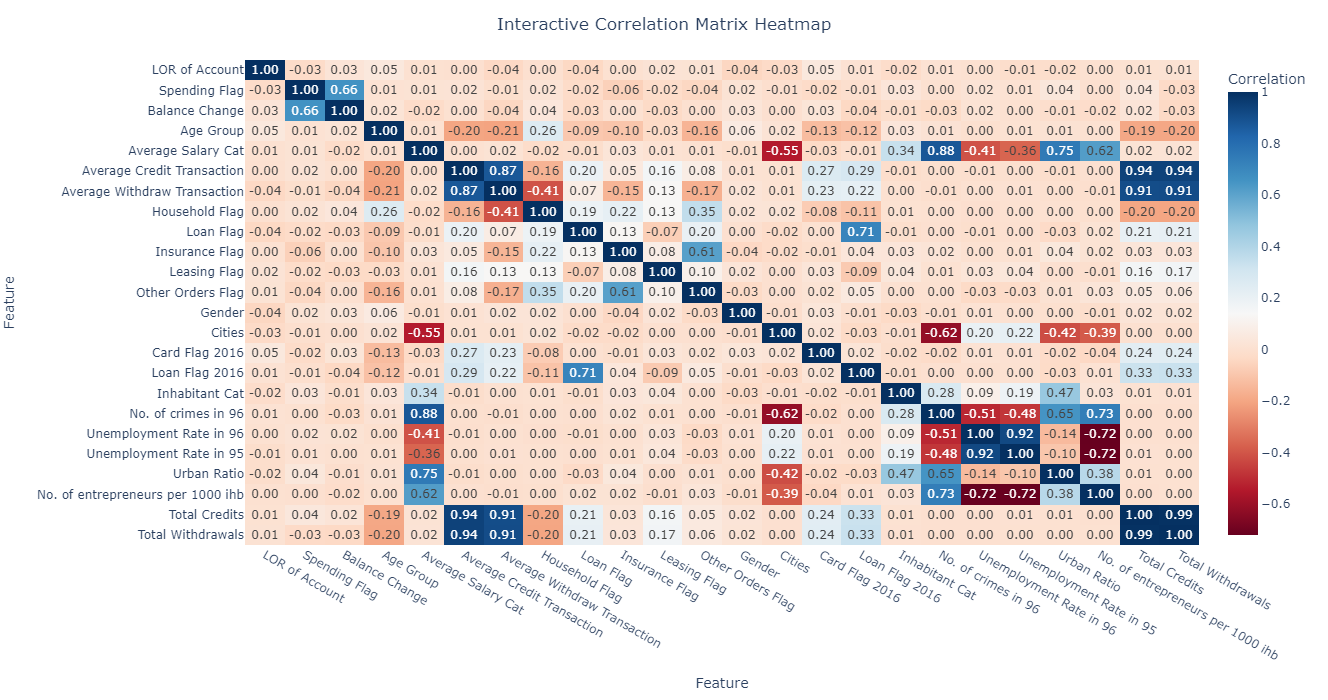

In [108]:
# Checking for the correlation between the independent variables
#Heatmap

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

iv_column_loan = possible_feature

# Calculate the correlation matrix
corr_matrix = merge_IV_DV[iv_column_loan].corr()

# Create a heatmap using Plotly with 'RdBu' color scale
fig = px.imshow(corr_matrix, text_auto=".2f", aspect="auto", 
                color_continuous_scale='RdBu', 
                labels=dict(x="Feature", y="Feature", color="Correlation"))

fig.update_layout(title='Interactive Correlation Matrix Heatmap', title_x=0.5,
                  autosize=False, width=900, height=700,
                  font=dict(size=12))

# Show the plot
fig.show()

In [109]:
# After removing some correlated features, we have this feature list for Loan to run Feature importance
testing_feature_loan = ['LOR of Account', 'Spending Flag', 'Balance Change', 'Age Group', 'Average Salary Cat',
                   'Average Credit Transaction',
                   'Household Flag','Loan Flag','Insurance Flag',
                   'Leasing Flag','Other Orders Flag',
                   'Gender','Cities','Card Flag 2016','Loan Flag 2016',
                   'Inhabitant Cat',
                   'Unemployment Rate in 96','Total Credits']

In [110]:
# Set the IV and DV list
iv_list = testing_feature_loan
dv_list = ['Loan Flag 2017']

# Assign to X, y
X = merge_IV_DV[iv_list]
y = merge_IV_DV[dv_list].squeeze()

In [111]:
# Quick test with Decision Tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train, y_train)

# Access feature importances
feature_importances = clf.feature_importances_

# Print or use the feature importances as needed
print("Feature Importances:")
for feature, importance in enumerate(feature_importances):
    print(f"Feature {feature + 1}: {importance}")

Feature Importances:
Feature 1: 0.052977894099333823
Feature 2: 0.0
Feature 3: 0.03303290379697033
Feature 4: 0.05872516230572504
Feature 5: 0.0
Feature 6: 0.010357020520919937
Feature 7: 0.003371302700931038
Feature 8: 0.05503884291365602
Feature 9: 0.0
Feature 10: 0.0
Feature 11: 0.0
Feature 12: 0.0
Feature 13: 0.0
Feature 14: 0.0
Feature 15: 0.6258941289183617
Feature 16: 0.0
Feature 17: 0.06721278342022435
Feature 18: 0.09338996132387774


In [112]:
# After selecting important features and run model many time with diffirent feature selection, 
# here are the final list of best features with highest accuracy rate
selected_feature_loan = ['LOR of Account','Spending Flag','Balance Change','Age Group',
                           'Average Salary Cat','Loan Flag 2016','Card Flag 2016','Household Flag']

## 6.2 Select feature for Credit Card

In [113]:
testing_feature_card = ['LOR of Account', 'Spending Flag', 'Balance Change', 'Age Group', 'Average Salary Cat',
                   'Average Credit Transaction',
                   'Household Flag','Loan Flag','Insurance Flag',
                   'Leasing Flag','Other Orders Flag',
                   'Gender','Cities','Card Flag 2016','Loan Flag 2016',
                   'Inhabitant Cat',
                   'Unemployment Rate in 96','Total Credits']

In [114]:
# Set the IV and DV list
iv_list = testing_feature_card
dv_list = ['Card Flag 2017']

# Assign to X, y
X1 = merge_IV_DV[iv_list]
y1 = merge_IV_DV[dv_list].squeeze()

In [115]:
# Quick test with Decision Tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train, y_train)

# Access feature importances
feature_importances = clf.feature_importances_

# Print or use the feature importances as needed
print("Feature Importances:")
for feature, importance in enumerate(feature_importances):
    print(f"Feature {feature + 1}: {importance}")

Feature Importances:
Feature 1: 0.03998463182179701
Feature 2: 0.013147952116913839
Feature 3: 0.0
Feature 4: 0.07697533642541855
Feature 5: 0.01904882108031466
Feature 6: 0.2594722097356584
Feature 7: 0.030675078655206925
Feature 8: 0.0
Feature 9: 0.0009341609786719966
Feature 10: 0.004450188226501438
Feature 11: 0.028320653717747106
Feature 12: 0.029156621072613673
Feature 13: 0.07185844333085974
Feature 14: 0.019542961004331477
Feature 15: 0.020348024144569342
Feature 16: 0.016289018235170247
Feature 17: 0.14485290229556422
Feature 18: 0.22494299715866137


In [116]:
# After selecting important features and run model many time with diffirent feature selection, 
# here are the final list of best features with highest accuracy rate
selected_feature_card = ['Average Salary Cat', 'Balance Change', 'Age Group',
                         'Spending Flag','Inhabitant Cat','Gender']

# 7. Modelling

## 7.1 Run Model for Loan

In [117]:
# Set the IV and DV list
iv_list = selected_feature_loan
dv_list = ['Loan Flag 2017']

# Assign to X, y
A = merge_IV_DV[iv_list]
b = merge_IV_DV[dv_list].squeeze()

In [118]:
# Quick test with Decision Tree and 5 fold CV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(clf, A, b, cv=5, scoring='accuracy')  # accuracy, roc_auc
print('Accuracy (11-fold CV) =', scores.mean())

Accuracy (11-fold CV) = 0.9660224912112497


## 7.2 Run Model for Card

In [119]:
# Set the IV and DV list
iv_list1 = selected_feature_card 
dv_list1 = ['Card Flag 2017']

# Assign to X, y
A1 = merge_IV_DV[iv_list1]
b1 = merge_IV_DV[dv_list1].squeeze()

In [120]:
# Quick test with Decision Tree and 5 fold CV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(clf, A1, b1, cv=5, scoring='accuracy')  # accuracy, roc_auc
print('Accuracy (11-fold CV) =', scores.mean())

Accuracy (11-fold CV) = 0.941046460530521


# 8. Data Analytics


Average Salary Cat
1    1181
2     519
5     272
3     233
4      34
Name: count, dtype: int64


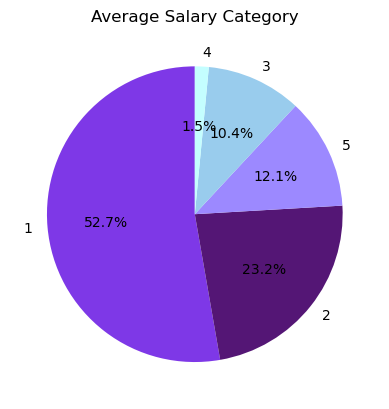

In [121]:
#Next, let's study average salary category

AvgSalary_Stats=merge_IV_DV['Average Salary Cat'].value_counts()
print(AvgSalary_Stats)

#Overall we can see in general most of the accounts fall under category1.
#Category 1: Avg Salary between 8000 and 9000,
#Category 2: Avg Salary between 9000 and 10000,
#Category 3: Avg Salary between 10000 and 11000,
#Category 4: Avg Salary between 11000 and 12000,
#Category 5: Avg Salary more than 12000
pie_colors = ['#7E38E7','#541675', '#9C89FF','#99CCED','#C4FEFF']
plt.pie(AvgSalary_Stats,labels=AvgSalary_Stats.index,autopct='%1.1f%%',startangle=90,colors = pie_colors)
plt.title('Average Salary Category')
plt.show()

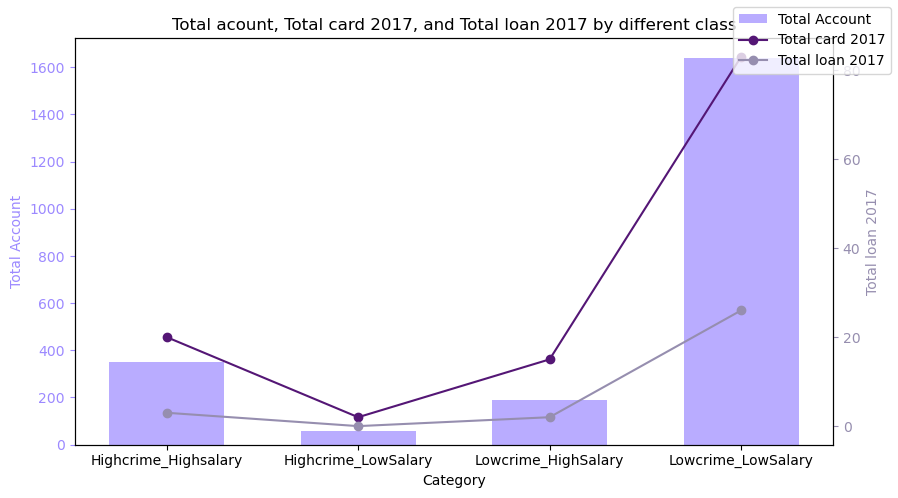

In [122]:
#Average Category Salary showed closely correlated to
#others variables such as crime, which is in turn correlated to cities and its urban ratio.
#The above can be seen in the correlation heatmap.

crime_mean= merge_IV_DV['No. of crimes in 96'].mean()
crime_mean
#Creating Categories to "zoom in" this correlation:
merge_IV_DV['Card Flag 2017'] = merge_IV_DV['Card Flag 2017'].astype(int)
merge_IV_DV['Loan Flag 2017'] = merge_IV_DV['Loan Flag 2017'].astype(int)

Highcrime_Highsalary = merge_IV_DV[(merge_IV_DV['No. of crimes in 96'] > crime_mean) & (merge_IV_DV['Average Salary Cat']>2)]
Highcrime_LowSalary = merge_IV_DV[(merge_IV_DV['No. of crimes in 96'] > crime_mean) & (merge_IV_DV['Average Salary Cat'] <=2)]
Lowcrime_HighSalary = merge_IV_DV[(merge_IV_DV['No. of crimes in 96'] <= crime_mean) & (merge_IV_DV['Average Salary Cat']>2)]
Lowcrime_LowSalary = merge_IV_DV[(merge_IV_DV['No. of crimes in 96'] <= crime_mean) & (merge_IV_DV['Average Salary Cat']<=2)]


merge_IV_DV['Card Flag 2017'] = merge_IV_DV['Card Flag 2017'].astype(int)
merge_IV_DV['Loan Flag 2017'] = merge_IV_DV['Loan Flag 2017'].astype(int)
new_dataset = pd.DataFrame({
    'Category': ['Highcrime_Highsalary', 'Highcrime_LowSalary', 'Lowcrime_HighSalary', 'Lowcrime_LowSalary'],
    'Total account_id': [len(Highcrime_Highsalary), len(Highcrime_LowSalary), len(Lowcrime_HighSalary), len(Lowcrime_LowSalary)],
    'Total card': [Highcrime_Highsalary['Card Flag 2017'].sum(), Highcrime_LowSalary['Card Flag 2017'].sum(), Lowcrime_HighSalary['Card Flag 2017'].sum(), Lowcrime_LowSalary['Card Flag 2017'].sum()],
    'Total loan': [Highcrime_Highsalary['Loan Flag 2017'].sum(), Highcrime_LowSalary['Loan Flag 2017'].sum(), Lowcrime_HighSalary['Loan Flag 2017'].sum(), Lowcrime_LowSalary['Loan Flag 2017'].sum()]
})

# Set the overall width of the chart
fig, ax1 = plt.subplots(figsize=(9, 5))  

# Bar chart for total account_id
bar_width = 0.6
ax1.bar(new_dataset['Category'], new_dataset['Total account_id'], color='#9C89FF', alpha=0.7,width=bar_width, label='Total Account')
ax1.set_xlabel('Category')
ax1.set_ylabel('Total Account', color='#9C89FF')
ax1.tick_params('y', colors='#9C89FF')

# Create a second y-axis for the line charts
ax2 = ax1.twinx()

# Line chart for total card
ax2.plot(new_dataset['Category'], new_dataset['Total card'], color='#541675', marker='o', label='Total card 2017')
ax2.set_ylabel('Total card 2017', color='#541675')
ax2.tick_params('y', colors='#541675')

# Line chart for total loan
ax2.plot(new_dataset['Category'], new_dataset['Total loan'], color='#968EAF', marker='o', label='Total loan 2017')
ax2.set_ylabel('Total loan 2017', color='#968EAF')
ax2.tick_params('y', colors='#968EAF')

# Title and legend
plt.title('Total acount, Total card 2017, and Total loan 2017 by different class')
fig.tight_layout()
fig.legend(loc='upper right')

# Show the plot
plt.show()

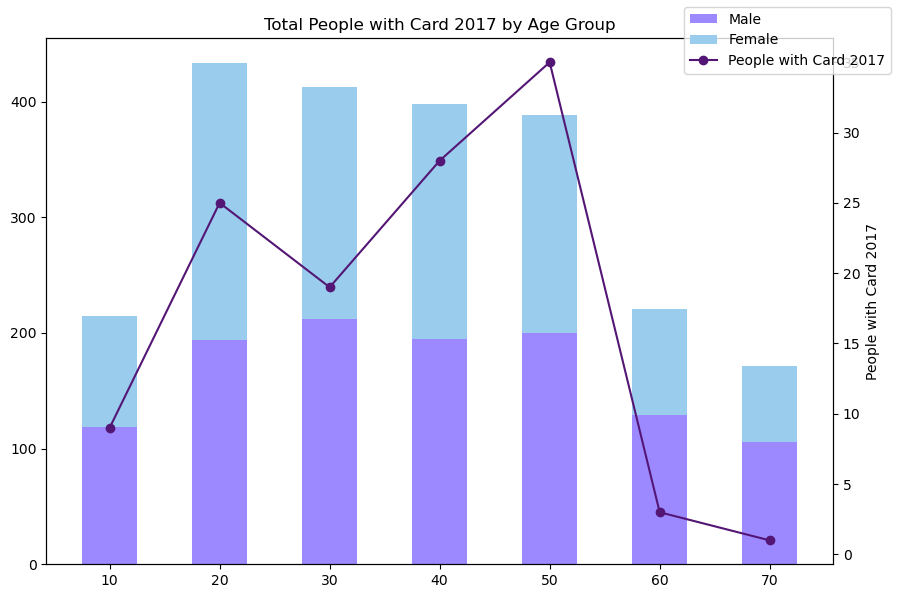

In [123]:
# Age group and gender

grouped_df = merge_IV_DV.groupby('Age Group').agg(total_people=('account_id', 'count'), people_with_card=('Card Flag 2017', 'sum')).reset_index()

# Group by age group and gender to calculate counts
gender_group_counts = merge_IV_DV.groupby(['Age Group', 'Gender']).size().unstack().reset_index()


# Set the overall width of the chart
fig, ax1 = plt.subplots(figsize=(9, 6))  # Adjust the figure size as needed

bar_width = 5  # Adjust this value to your desired width

# Bar chart for Male (1)
ax1.bar(gender_group_counts['Age Group'], gender_group_counts['1'], label='Male',width=bar_width, color='#9C89FF')

# Bar chart for Female (0)
ax1.bar(gender_group_counts['Age Group'], gender_group_counts['0'], label='Female', bottom=gender_group_counts['1'],width=bar_width, color='#99CCED')

# Create a second y-axis for the line chart
ax2 = ax1.twinx()

# Line chart for total number of people with a card
ax2.plot(grouped_df['Age Group'], grouped_df['people_with_card'], color='#541675', marker='o', label='People with Card 2017')
ax2.set_ylabel('People with Card 2017', color='black')
ax2.tick_params('y', colors='black')

# Title and legend
plt.title('Total People with Card 2017 by Age Group')
fig.tight_layout()
fig.legend(loc='upper right')

# Show the plot
plt.show()

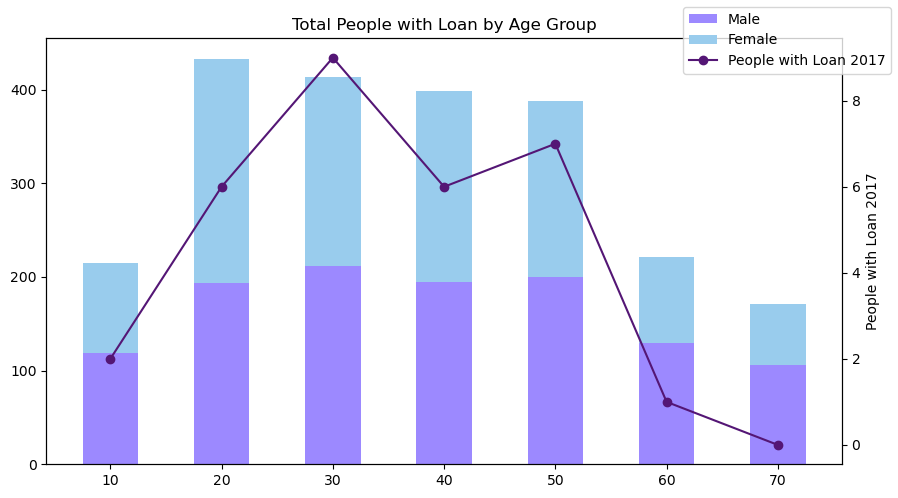

In [124]:
# Age group and gender

grouped_df = merge_IV_DV.groupby('Age Group').agg(total_people=('account_id', 'count'), people_with_loan=('Loan Flag 2017', 'sum')).reset_index()
# Group by age group and gender to calculate counts
gender_group_counts = merge_IV_DV.groupby(['Age Group', 'Gender']).size().unstack().reset_index()

# Set the overall width of the chart
fig, ax1 = plt.subplots(figsize=(9,5))  # Adjust the figure size as needed

bar_width = 5  # Adjust this value to your desired width

# Bar chart for Male (1)
ax1.bar(gender_group_counts['Age Group'], gender_group_counts['1'], label='Male',width=bar_width, color='#9C89FF')

# Bar chart for Female (0)
ax1.bar(gender_group_counts['Age Group'], gender_group_counts['0'], label='Female', bottom=gender_group_counts['1'],width=bar_width, color='#99CCED')

# Create a second y-axis for the line chart
ax2 = ax1.twinx()

# Line chart for total number of people with a card
ax2.plot(grouped_df['Age Group'], grouped_df['people_with_loan'], color='#541675', marker='o', label='People with Loan 2017')
ax2.set_ylabel('People with Loan 2017', color='black')
ax2.tick_params('y', colors='black')

# Title and legend
plt.title('Total People with Loan by Age Group')
fig.tight_layout()
fig.legend(loc='upper right')

# Show the plot
plt.show()

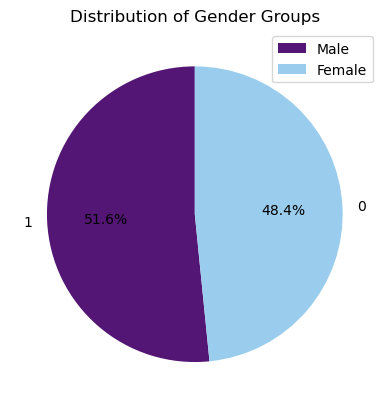

In [125]:
# Display age gender
# Count the number of accounts in each gender group
gender_group_counts = merge_IV_DV['Gender'].value_counts()

# Create a pie chart
plt.pie(gender_group_counts, labels=gender_group_counts.index, autopct='%1.1f%%', startangle=90, colors = ['#541675', '#99CCED'])
plt.legend(['Male', 'Female'])
plt.title('Distribution of Gender Groups')
plt.show()

Text(0, 0.5, 'Average Salary')

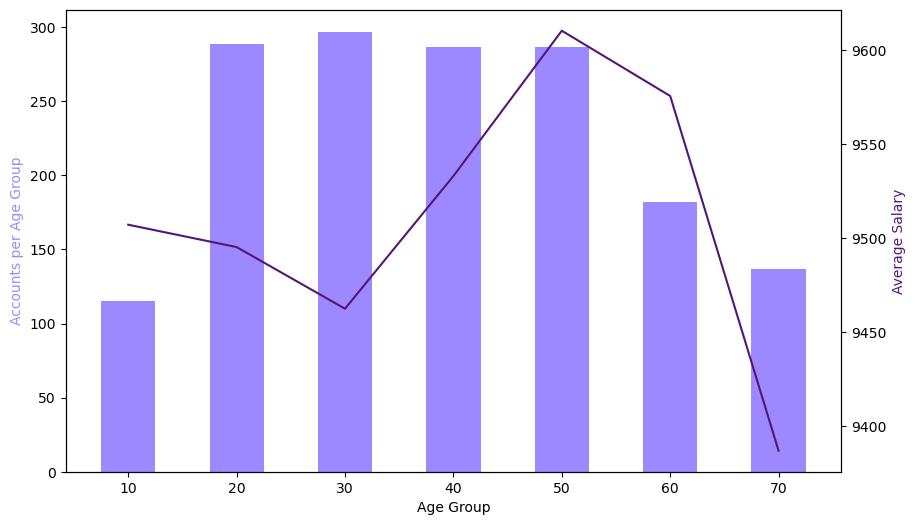

In [126]:
# Salary and Age

THOsubset=merge_IV_DV[merge_IV_DV['Total Household Orders'] == 1]
THO_AgeGroup=THOsubset['Age Group'].value_counts()
avg_salary_cat_age_group=merge_IV_DV.groupby('Age Group')['Avarage Salary'].mean()

fig,ax= plt.subplots(figsize=(10,6))
ax.bar(THO_AgeGroup.index,THO_AgeGroup,color='#9C89FF',width=5)
ax2=ax.twinx()

ax2.plot(avg_salary_cat_age_group.index,avg_salary_cat_age_group,color='#541675')
ax.set_xlabel('Age Group')
ax.set_ylabel('Accounts per Age Group',color='#9C89FF')
ax2.set_ylabel('Average Salary',color='#541675')

#As we can see age group has some correlation with the who has household orders.
#The age groups with the least household orders are the 10s, the 60s and 70s.
#Having a loan had a significance in our models, especially for the loan models.
#Loan can be seen favorably in a customer's loan application if payments are made in time.

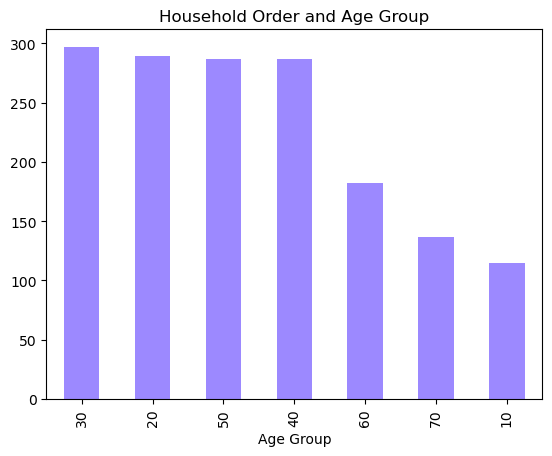

In [127]:
# Age group and household order
# Calculate value counts

THO_AgeGroup = THOsubset['Age Group'].value_counts()

# Set custom color for the bar chart (replace with your preferred color)
bar_chart_color = '#9C89FF'

# Create a bar chart with custom color
THO_AgeGroup.plot(kind='bar', color=bar_chart_color)

# Set labels and title
plt.title('Household Order and Age Group')

# Show the plot
plt.show()

#As we can see age group has some correlation with the who has household orders.
#The age groups with the least household orders are the 10s, the 60s and 70s.
#Having a loan had a significance in our models, especially for the loan models.
#Loan can be seen favorably in a customer's loan application if payments are made in time.

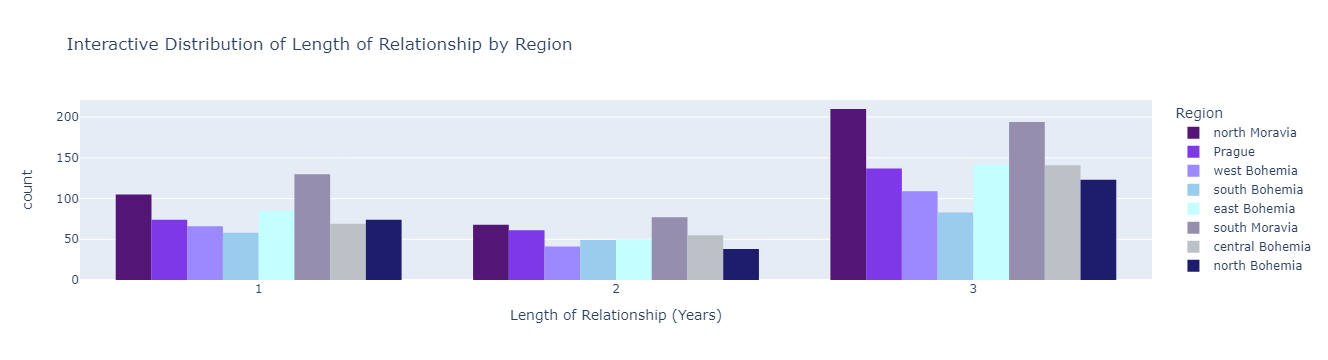

In [128]:
# LOR and Region
import plotly.express as px
import pandas as pd

# Creating an interactive graph using Plotly
# plotly_colors = ['#7E38E7','#541675', '#9C89FF','#99CCED','#C4FEFF','#968EAF','#BBC1C6','#1e1d6d']
color_map = {'north Moravia': '#541675', 'Prague': '#7E38E7', 'west Bohemia': '#9C89FF', 'south Bohemia': '#99CCED',
            'east Bohemia': '#C4FEFF', 'south Moravia': '#968EAF', 'central Bohemia': '#BBC1C6','north Bohemia': '#1e1d6d'}

fig = px.histogram(merge_IV, x='LOR of Account', color='Region', 
                   barmode='group',color_discrete_map=color_map,
                   labels={'LOR of Account': 'Length of Relationship (Years)', 'count': 'Number of Accounts'},
                   title='Interactive Distribution of Length of Relationship by Region')
fig.show()

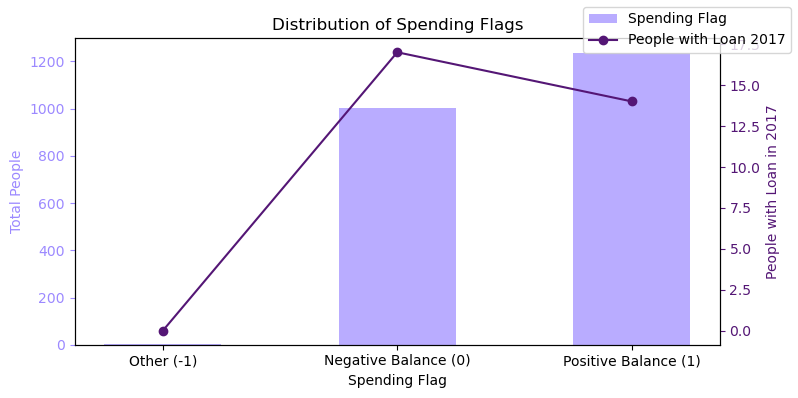

In [129]:
# Correlation between LOR and Loan

grouped_df_speanding = merge_IV_DV.groupby('Spending Flag').agg(total_people=('account_id', 'count'), people_with_loan=('Loan Flag 2017', 'sum')).reset_index()
grouped_df_speanding['Spending Flag'] = grouped_df_speanding['Spending Flag'].astype(int)
fig, ax1 = plt.subplots(figsize=(8, 4))

bar_width = 0.5# Adjust this value to your desired width
ax1.bar(grouped_df_speanding['Spending Flag'], grouped_df_speanding['total_people'], color='#9C89FF', alpha=0.7, width=bar_width, label='Spending Flag')
ax1.set_xlabel('Spending Flag')
ax1.set_xticks([0, 1,-1])
ax1.set_xticklabels(['Negative Balance (0)', 'Positive Balance (1)','Other (-1)'])
ax1.set_ylabel('Total People', color='#9C89FF')
ax1.tick_params('y', colors='#9C89FF')

# Create a second y-axis for the line chart
ax2 = ax1.twinx()

# Line chart for total number of people with a card
ax2.plot(grouped_df_speanding['Spending Flag'], grouped_df_speanding['people_with_loan'], color='#541675', marker='o', label='People with Loan 2017')
ax2.set_ylabel('People with Loan in 2017', color='#541675')
ax2.tick_params('y', colors='#541675')

# Title and legend
plt.title('Distribution of Spending Flags')
fig.tight_layout()
fig.legend(loc='upper right')

# Show the plot
plt.show()

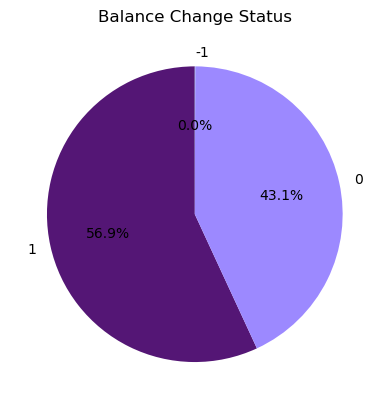

In [130]:
#We can see that overall there were more accounts where the last balance of the year for 1996 
#was higher than the first balance report 

SP_Pie=merge_IV_DV['Balance Change'].value_counts()

#As reminder, balance change is a flag variable that turns to:
#1 if last balance > begin balance
#0 if last balance < begin balance

custom_colors = ['#541675', '#9C89FF','#99CCED']
plt.pie(SP_Pie,labels=SP_Pie.index,autopct='%1.1f%%',startangle=90,colors=custom_colors)
plt.title('Balance Change Status')
plt.show()


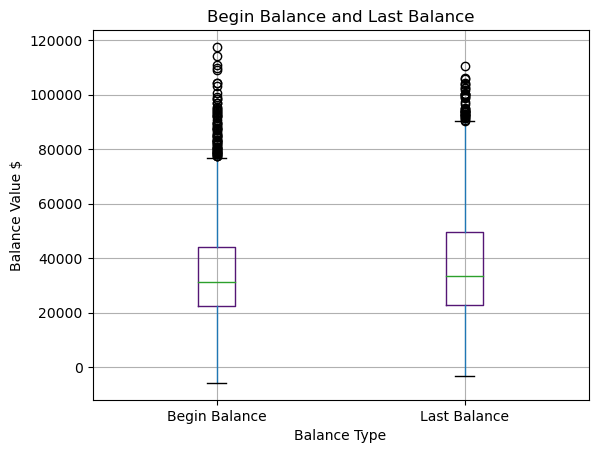

In [131]:
#Plotting them side to side:

boxplot_color = '#541675'

# Create a box plot with custom color
merge_IV_DV[['Begin Balance', 'Last Balance']].boxplot(boxprops=dict(color=boxplot_color))

# Set labels and title
plt.xlabel('Balance Type')
plt.ylabel('Balance Value $')
plt.title('Begin Balance and Last Balance')

# Show the plot
plt.show()

#Overall, we see an overall improvement in the minimum balance, the mean and the median;
#All increasing from begin balance to last balance despite the max value decreasing.

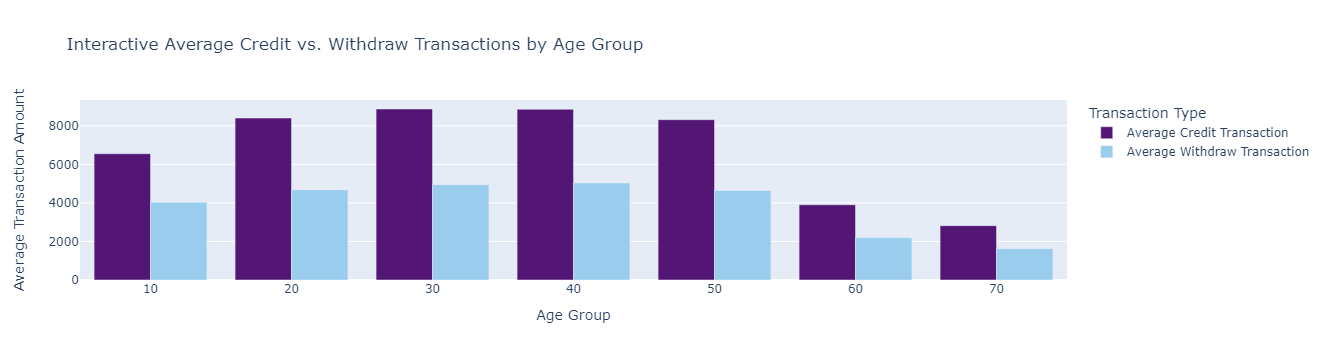

In [132]:
# Correlation between transaction amount and Age
import pandas as pd
import plotly.express as px


# Grouping data by 'Age Group' and calculating the mean for credit and withdrawal transactions
grouped_data = merge_IV.groupby('Age Group')[['Average Credit Transaction', 'Average Withdraw Transaction']].mean().reset_index()

# Melting the data for easier plotting in Plotly
melted_data = grouped_data.melt(id_vars='Age Group', var_name='Transaction Type', value_name='Average Amount')

# Define custom colors for each transaction type
color_map = {'Average Credit Transaction': '#541675', 'Average Withdraw Transaction': '#99CCED'}

# Creating the interactive bar chart with custom colors
fig = px.bar(melted_data, x='Age Group', y='Average Amount', color='Transaction Type',
             title='Interactive Average Credit vs. Withdraw Transactions by Age Group',
             labels={'Average Amount': 'Average Transaction Amount', 'Transaction Type': 'Transaction Type'},
             barmode='group',
             color_discrete_map=color_map)

fig.update_layout(xaxis_title='Age Group', yaxis_title='Average Transaction Amount')
fig.show()

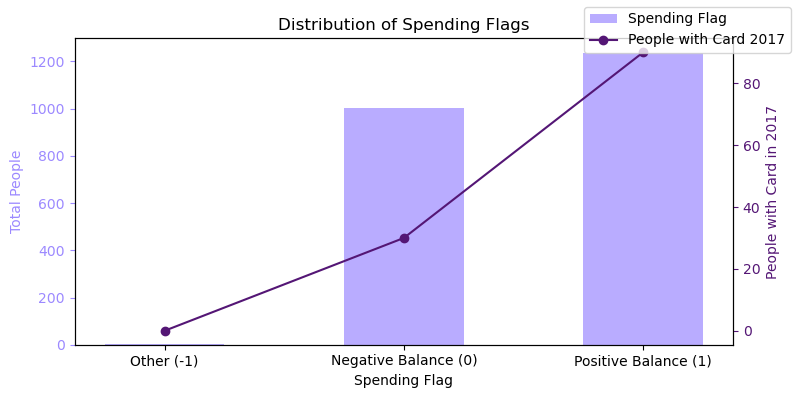

In [133]:
#Spending Flag and Card

grouped_df_speanding = merge_IV_DV.groupby('Spending Flag').agg(total_people=('account_id', 'count'), people_with_loan=('Card Flag 2017', 'sum')).reset_index()
grouped_df_speanding['Spending Flag'] = grouped_df_speanding['Spending Flag'].astype(int)
fig, ax1 = plt.subplots(figsize=(8, 4))

bar_width = 0.5# Adjust this value to your desired width
ax1.bar(grouped_df_speanding['Spending Flag'], grouped_df_speanding['total_people'], color='#9C89FF', alpha=0.7, width=bar_width, label='Spending Flag')
ax1.set_xlabel('Spending Flag')
ax1.set_xticks([0, 1,-1])
ax1.set_xticklabels(['Negative Balance (0)', 'Positive Balance (1)','Other (-1)'])
ax1.set_ylabel('Total People', color='#9C89FF')
ax1.tick_params('y', colors='#9C89FF')

# Create a second y-axis for the line chart
ax2 = ax1.twinx()

# Line chart for total number of people with a card
ax2.plot(grouped_df_speanding['Spending Flag'], grouped_df_speanding['people_with_loan'], color='#541675', marker='o', label='People with Card 2017')
ax2.set_ylabel('People with Card in 2017', color='#541675')
ax2.tick_params('y', colors='#541675')

# Title and legend
plt.title('Distribution of Spending Flags')
fig.tight_layout()
fig.legend(loc='upper right')

# Show the plot
plt.show()

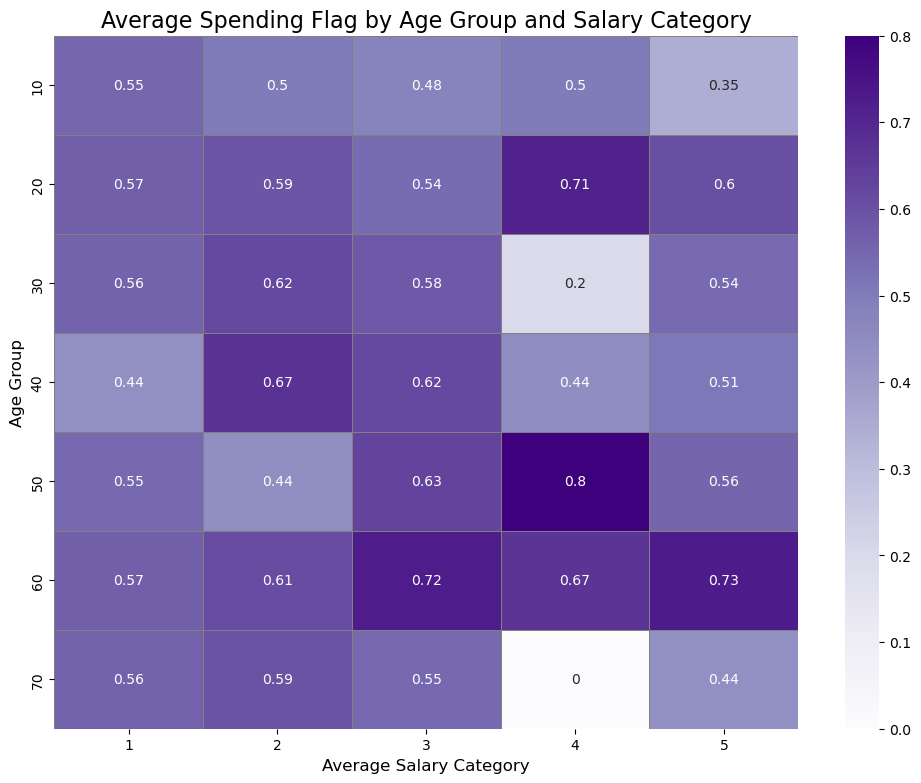

In [134]:
# Spending flag, age group and salary

merge_IV['Spending Flag'] = pd.to_numeric(merge_IV['Spending Flag'], errors='coerce')

# Grouping the data by 'Age Group' and 'Average Salary Cat' for the mean of 'Spending Flag'
age_salary_spending = merge_IV.groupby(['Age Group', 'Average Salary Cat'])['Spending Flag'].mean().unstack()

# Adjusting the heatmap with a purple theme and a more aesthetically pleasing look
plt.figure(figsize=(12, 9))
sns.heatmap(age_salary_spending, annot=True, cmap="Purples", linewidths=.5, linecolor='gray')
plt.title('Average Spending Flag by Age Group and Salary Category', fontsize=16)
plt.ylabel('Age Group', fontsize=12)
plt.xlabel('Average Salary Category', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

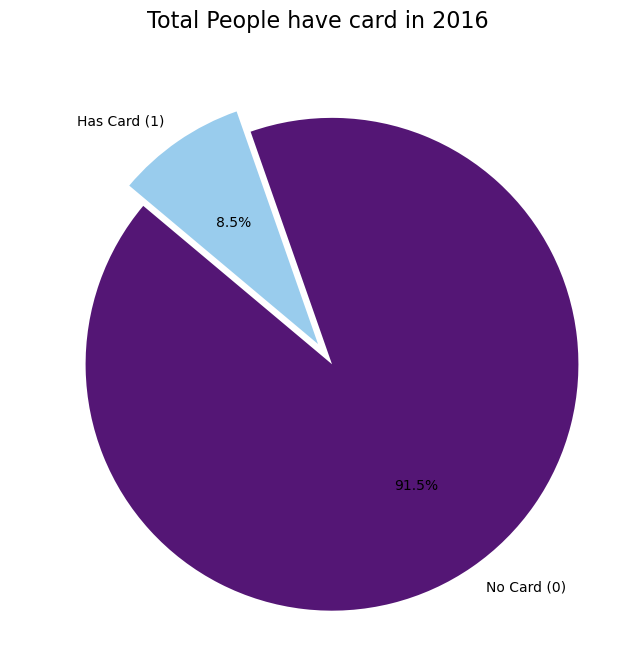

In [138]:
# Card Flag 2016
card_flag_counts = merge_IV['Card Flag 2016'].value_counts()

colors = ['#541675', '#99CCED']
explode = (0.1, 0)  

plt.figure(figsize=(8, 8))
plt.pie(card_flag_counts, labels=['No Card (0)','Has Card (1)'], autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Total People have card in 2016', fontsize=16)
plt.show()

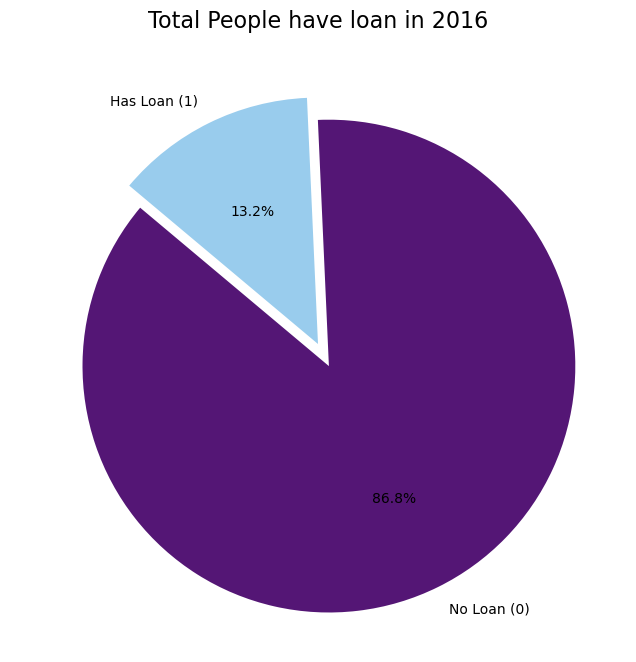

In [140]:
#Loan Flag 2016

card_flag_counts = merge_IV['Loan Flag 2016'].value_counts()
colors = ['#541675', '#99CCED']
explode = (0.1, 0)  

plt.figure(figsize=(8, 8))
plt.pie(card_flag_counts, labels=['No Loan (0)','Has Loan (1)'], autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Total People have loan in 2016', fontsize=16)
plt.show()